Существует множество специальностей в области работы с данными, так как это достаточно широкая область. Некоторые из них:

1. Data Analyst (аналитик данных)
2. Data Scientist (ученый по данным)
3. Data Engineer (инженер данных)
4. Business Intelligence Analyst (аналитик бизнес-интеллекта)
5. Machine Learning Engineer (инженер машинного обучения)
6. Big Data Engineer (инженер больших данных)
7. Database Administrator (администратор баз данных)
8. Data Visualization Specialist (специалист по визуализации данных)
9. Data Architect (архитектор данных)
10. Quantitative Analyst (квантитативный аналитик)
11. Data Mining Engineer (инженер по добыче данных)
12. Predictive Analyst (аналитик прогнозирования)
13. Data Governance Analyst (аналитик управления данными)
14. Data Quality Analyst (аналитик качества данных)
15. Data Security Analyst (аналитик безопасности данных)
16. Data Warehousing Analyst (аналитик хранилища данных)

И другие.

Как правмло, их разделяют на следующие группы:

1. Data Analyst: специалист по обработке и анализу данных, который собирает, обрабатывает и проводит статистический анализ больших объемов данных, чтобы извлечь инсайты и принимать бизнес-решения. Он также отвечает за очистку данных, создание отчетов и визуализацию данных.

2. Data Scientist: специалист по анализу данных, который использует статистические, математические и методы машинного обучения для построения моделей и алгоритмов для прогнозирования и оптимизации бизнес-результатов. Он может также отвечать за очистку данных, подготовку данных и визуализацию данных.

3. Data Engineer: специалист по разработке и поддержке инфраструктуры для хранения, обработки и управления большими объемами данных. Он отвечает за обеспечение того, чтобы данные были доступны аналитикам и ученым вовремя и эффективно.

4. Business Intelligence (BI) Analyst: специалист по сбору, анализу и представлению бизнес-данных, чтобы информировать принятие решений. Он создает дашборды и отчеты, которые предоставляют инсайты в ключевые показатели эффективности и отслеживают прогресс в достижении организационных целей.

5. Database Administrator (DBA): специалист, отвечающий за обеспечение безопасности, производительности и доступности баз данных организации. Он разрабатывает и внедряет планы резервного копирования и восстановления, мониторит производительность баз данных и обеспечивает правильное хранение и защиту данных.

In [1]:
import requests                 # Библиотека работы с HTTP-запросами по API
import json                     # Для обработки полученных результатов запросов
import time                     # Для задержки между запросами
import os                       # Для работы с файлами
import pandas as pd             # Для формирования датафрейма с результатами
import re                       # Для работы с регулярными выражениями
import numpy as np              # Библиотека работы с массивами
import seaborn as sns           # Статистическая визуализация данных
import matplotlib.pyplot as plt # Визуализация данных
import plotly.graph_objs as go
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import random
import textract
from sklearn.metrics.pairwise import cosine_similarity
import pymorphy3

In [2]:
# ## МОДУЛЬ ПАРСИНГА ВАКАНСИЙ С КРАТКИМ ОПИСАНИЕМ ##
# def get_vacancies(job_title, page=0, retries=5):
#     '''Функция запроса страницы.
#        job_title - наименование вакансии
#        page - Индекс страницы
#        retries - количество попыток повторения запроса
#        (по умолчанию начинается с первой страницы)'''

#     # Справочник для переменной GET-запроса
#     # Значения для указания значений в справочнике 
#     # указаны в документации к API hh.ru по ссылке: 
#     # https://github.com/hhru/api
#     params = {
#         'text': job_title,
#         'area': 113,
#         'page': page,
#         'per_page': 100
#     }

#     for i in range(retries):
#         try:
#             req = requests.get('https://api.hh.ru/vacancies', params, timeout=20)
#             data = req.content.decode()
#             req.close()
#             response = json.loads(data)
#             # Проверяем, что в ответе нет ошибки Bad Gateway
#             if 'errors' in response and any(error['type'] == 'bad_gateway' for error in response['errors']):
#                 print('Получена ошибка Bad Gateway. Повторяем через {retry_time} сек.')
#                 if i == retries - 1:
#                     print('Не удалось выполнить запрос. Проверьте соединение.')
#                     return None
#                 time.sleep(3 * (2 ** i))
#                 continue
#             return data
#         except requests.exceptions.RequestException as e:
#             print(f"Ошибка при запросе страницы {page}: {e}")
#             print(f"Попытка {i+1}/{retries}...")
#             time.sleep(0.25)

#     print(f"Не удалось получить данные для страницы {page}")
#     return None


# # Сделаем запрос к API hh.ru по вакансиям

# vacancies = []
# vacancies_ids = set()
# job_titles = [
#     "data engineer",
#     "инженер данных",
#     "data analyst",
#     "аналитик данных",
#     "аналитик",
#     "analyst",
#     "data",
#     "дата",
#     "data scientist",
#     "сайнтист",
#     "сайнс"
#     "BI",
#     "ETL"
# ]

# for job_title in job_titles:
#     for page in range(0, 100):
#         # Запрашиваем страницу с вакансиями
#         response = json.loads(get_vacancies(job_title, page))
#         # Получаем список вакансий на странице
#         items = response['items']
#         for item in items:
#             # Проверяем, что вакансия не была уже добавлена в список
#             if item['id'] not in vacancies_ids:
#                 # Проверяем, что в названии вакансии есть искомое слово
#                 if any(title in item['name'].lower() for title in job_titles):
#                     # Добавляем вакансию в список
#                     vacancies.append(item)
#                     # Добавляем id вакансии во множество уже просмотренных id
#                     vacancies_ids.add(item['id'])
#         # Проверяем, является ли страница последней
#         if response['pages'] - page <= 1:
#             break
#         # Делаем задержку между запросами
#         time.sleep(0.25)

# # Сохраняем полученные вакансии в файле
# with open('data/vacancies.json', 'w', encoding='utf-8') as f:
#     json.dump(vacancies, f, ensure_ascii=False, indent=4)

# print('Вакансии по запросу собраны и сохранены в файл vacancies.json')
# # Количество вакансий
# print(f"Количество собранных вакансий: {len(vacancies)}")

# # Количество уникальных значений ключа 'name'
# unique_names = set([v['name'] for v in vacancies])
# names_count = len(unique_names)

# print(f"Количество уникальных названий вакансий: {names_count}")

In [3]:
# ## ФУНКЦИЯ ПОЛУЧЕНИЯ ПОДРОБНОГО ОПИСАНИЯ ##
# # Теперь получим полные описания для всех собранных вакансий

# def get_description(vacancy_id):
#     url = f'https://api.hh.ru/vacancies/{vacancy_id}'
#     headers = {'User-Agent': 'Mozilla/5.0'}
#     description = ""

#     while True:
#         try:
#             response = requests.get(url, headers=headers)
#             if response.status_code == 200:
#                 data = response.json()
#                 description = data['description']
#                 time.sleep(0.5)
#                 break
#             elif response.status_code == 403:
#                 raise ValueError("Требуется решить капчу. Прекращение выполнения функции.")
#         except requests.exceptions.RequestException:
#             print(f"Ошибка получения описания вакансии {vacancy_id}. Повтор запроса через 0.2 секунды.")
#             time.sleep(0.2)
#             continue
    
#     return description

In [4]:
# # Чтение файла vacancies.json и создание словаря vacancies_dict
# with open('data/vacancies.json', 'r', encoding='utf-8') as f:
#     vacancies = json.load(f)
# vacancies_dict = {vacancy["id"]: "" for vacancy in vacancies}

In [5]:
# # Получим незагруженные описания вакансий

# # Обход словаря vacancies_dict и заполнение значениями ключа "description"
# # делаем это для вакансий, описание которых еще не получили 

# def fill_vacancy_descriptions(vacancies_dict):
#     for vacancy_id in vacancies_dict:
#         if not vacancies_dict[vacancy_id]:
#             try:
#                 vacancies_dict[vacancy_id] = get_description(vacancy_id)
#                 time.sleep(0.2)
#             except ValueError as e:
#                 print(e)
#                 break
#     return vacancies_dict

# filled_dict = fill_vacancy_descriptions(vacancies_dict)

In [6]:
# ## МОДУЛЬ ДОЗАПОЛНЕНИЯ

# # Чтение файла vacancies_with_descriptions.json и создание словаря vacancies_dict
# with open('data/vacancies_with_descriptions.json', 'r', encoding='utf-8') as f:
#     vacancies = json.load(f)
# vacancies_dict = {vacancy["id"]: vacancy["description"] for vacancy in vacancies}

# # заполняем описание вакансий, у которых в ключе дескрипшн пусто 
# def fill_vacancy_descriptions(vacancies_dict):
#     for id, description in vacancies_dict.items():
#         if not description:
#             try:
#                 new_description = get_description(id)
#                 if new_description:
#                     vacancies_dict[id] = new_description
#                     time.sleep(0.2)
#             except ValueError as e:
#                 print(e)
#                 break
#     return vacancies_dict

# filled_dict = fill_vacancy_descriptions(vacancies_dict)


In [7]:
# # Добавление ключа "description" для каждой вакансии, если его нет
# for vacancy in vacancies:
#     if "description" not in vacancy:
#         vacancy["description"] = ""

# # Запись описания вакансии в ключ "description", если его нет или он пустой
# for vacancy in vacancies:
#     if not vacancy["description"]:
#         vacancy_id = vacancy["id"]
#         description = vacancies_dict.get(vacancy_id, "")
#         if description:
#             vacancy["description"] = description


In [8]:
# # Сохранение результата в файл descriptions.json
# with open('data/descriptions.json', 'w', encoding='utf-8') as f:
#     json.dump(vacancies_dict, f, ensure_ascii=False, indent=4)

In [9]:
# # Здесь загрузим ранее собранные вакансии, добавим в них описание из 
# # vacancies_dict  


# #  Чтение файла vacancies.json и создание словаря vacancies
# with open('data/vacancies.json', 'r', encoding='utf-8') as f:
#     vacancies = json.load(f)

# # Добавление ключа "description" для каждой вакансии
# for vacancy in vacancies:
#     vacancy["description"] = ""

# # Запись описания вакансии в ключ "description"
# for vacancy in vacancies:
#     vacancy_id = vacancy["id"]
#     description = vacancies_dict.get(vacancy_id, "Описание вакансии не найдено")
#     vacancy["description"] = description

In [10]:
# # Сохранение результат в файл vacancies_with_descriptions.json
# with open('data/vacancies_with_descriptions.json', 'w', encoding='utf-8') as f:
#     json.dump(vacancies, f, ensure_ascii=False, indent=4)

In [11]:
# # счетчики в переменной vacancies_dict

# total_vacancies = len(vacancies_dict)
# empty_vacancies = sum(1 for desc in vacancies_dict.values() if not desc)
# filled_vacancies = sum(1 for desc in vacancies_dict.values() if desc)
# print(f'total: {total_vacancies}')
# print(f'filled: {filled_vacancies}')
# print(f'empty: {empty_vacancies}')

In [12]:
# # счетчики в переменной filled_dict

# total_vacancies = len(filled_dict)
# empty_vacancies = sum(1 for desc in filled_dict.values() if not desc)
# filled_in_filled = sum(1 for desc in filled_dict.values() if desc)
# print(f'total: {total_vacancies}')
# print(f'filled: {filled_in_filled}')
# print(f'empty: {empty_vacancies}')

In [13]:
# # счетчики в переменной vacancies

# total_in_vacancies = sum(1 for vacancy in vacancies if 'id' in vacancy)
# count_empty_description = len([vacancy for vacancy in vacancies if not vacancy['description']])
# count_filled_description = len([vacancy for vacancy in vacancies if vacancy['description']])
# print(f'total in vacancies: {total_in_vacancies}')
# print(f'empty in vacancies: {count_empty_description}')
# print(f'filled in vacancies: {count_filled_description}')

In [14]:
# # Проверим, попала ли в выборку вакансия, опубликованная на hh одной из последних:

# # Открываем файл с вакансиями и загружаем их в переменную vacancies
# with open('data/vacancies.json', 'r', encoding='utf-8') as f:
#     vacancies = json.load(f)

# # ID вакансии, которую нужно найти
# vacancy_id = '78954091'

# # Поиск вакансии по ID и вывод ее описания
# for vacancy in vacancies:
#     if vacancy['id'] == vacancy_id:
#         print("Вакансия:\n", vacancy['name'])
#         print("\nОбязанности:\n", vacancy['snippet']['responsibility'])
#         print("\nТребования:\n", vacancy['snippet']['requirement'])
#         break
# else:
#     print(f"Вакансия с номером {vacancy_id} не найдена")


In [15]:
# Далее загрузим вакансии в пандас датафрейм

# открываем json-файл и загружаем данные
with open('data/vacancies_with_descriptions.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# преобразуем json в pandas dataframe
df = pd.json_normalize(data)

In [16]:
# Сделаем так, чтобы выводились все столбцы датафрейма
pd.set_option('display.max_columns', None)

In [17]:
df.head(3)


,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,archived,apply_alternate_url,insider_interview,url,adv_response_url,alternate_url,relations,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,description,area.id,area.name,area.url,salary.from,salary.to,salary.currency,salary.gross,type.id,type.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.logo_urls,employer.vacancies_url,employer.trusted,snippet.requirement,snippet.responsibility,experience.id,experience.name,employment.id,employment.name,employer.logo_urls.original,employer.logo_urls.90,employer.logo_urls.240,salary,address.city,address.street,address.building,address.lat,address.lng,address.description,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,department.id,department.name,address.metro,insider_interview.id,insider_interview.url,immediate_redirect_url
0,79110745,False,Data Engineer,NaN,False,False,NaN,None,None,2023-04-16T14:42:13+0300,2023-04-16T14:42:13+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/79110745?host=hh.ru,None,https://hh.ru/vacancy/79110745,[],None,None,[],[],[],True,"[{'id': '96', 'name': 'Программист, разработчи...",False,<p>Ищу <strong>Data Engineer</strong> в SportT...,1,Москва,https://api.hh.ru/areas/1,4000.0,6000.0,EUR,True,open,Открытая,5231648,4CV Recruitment Services,https://api.hh.ru/employers/5231648,https://hh.ru/employer/5231648,NaN,https://api.hh.ru/vacancies?employer_id=5231648,True,Разговорный английский. Опыт работы <highlight...,Взаимодействие с <highlighttext>data</highligh...,between3And6,От 3 до 6 лет,full,Полная занятость,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79120615,False,Data engineer,NaN,False,True,NaN,None,None,2023-04-16T17:13:22+0300,2023-04-16T17:13:22+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/79120615?host=hh.ru,None,https://hh.ru/vacancy/79120615,[],None,None,[],[],[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"<p>В крупную исследовательскую компанию, специ...",1,Москва,https://api.hh.ru/areas/1,180000.0,250000.0,RUR,False,open,Открытая,30486,РВИ,https://api.hh.ru/employers/30486,https://hh.ru/employer/30486,NaN,https://api.hh.ru/vacancies?employer_id=30486,True,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...",between1And3,От 1 года до 3 лет,full,Полная занятость,https://hhcdn.ru/employer-logo-original/225674...,https://hhcdn.ru/employer-logo/315944.png,https://hhcdn.ru/employer-logo/388801.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78934984,False,Data engineer (Стажер),NaN,False,False,NaN,None,None,2023-04-14T11:13:27+0300,2023-04-14T11:13:27+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,NaN,https://api.hh.ru/vacancies/78934984?host=hh.ru,None,https://hh.ru/vacancy/78934984,[],None,None,[],[],[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,<p><strong>НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! Ч...,1,Москва,https://api.hh.ru/areas/1,NaN,NaN,NaN,NaN,open,Открытая,1789341,Sapiens solutions,https://api.hh.ru/employers/1789341,https://hh.ru/employer/1789341,NaN,https://api.hh.ru/vacancies?employer_id=1789341,True,Имеете высшее образование или заканчиваете учи...,По результатам обучения – обязательная защита ...,noExperience,Нет опыта,probation,Стажировка,https://hhcdn.ru/employer-logo-original/909827...,https://hhcdn.ru/employer-logo/4079995.png,https://hhcdn.ru/employer-logo/4079996.png,NaN,Москва,Нижняя Красносельская улица,40/12к2,55.774284,37.669145,NaN,"Москва, Нижняя Красносельская улица, 40/12к

Видим, что в столбце 'professional_roles' данные не нормализовались. Что бы разобрать вложенный список из professional_roles, применим к столбцу лямбда-функцию, разделим его на два новых столбца, старый удалим:

In [18]:
df[["professional_roles_id", "professional_roles_name"]] = df[
    "professional_roles"
].apply(
    lambda x: pd.Series(
        {"professional_roles_id": x[0]["id"], "professional_roles_name": x[0]["name"]}
    )
)
df = df.drop("professional_roles", axis=1)


In [19]:
# Выведем названия столбцов
print(df.columns)

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'address', 'response_url',
       'sort_point_distance', 'published_at', 'created_at', 'archived',
       'apply_alternate_url', 'insider_interview', 'url', 'adv_response_url',
       'alternate_url', 'relations', 'contacts', 'schedule', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'accept_incomplete_resumes', 'description', 'area.id', 'area.name',
       'area.url', 'salary.from', 'salary.to', 'salary.currency',
       'salary.gross', 'type.id', 'type.name', 'employer.id', 'employer.name',
       'employer.url', 'employer.alternate_url', 'employer.logo_urls',
       'employer.vacancies_url', 'employer.trusted', 'snippet.requirement',
       'snippet.responsibility', 'experience.id', 'experience.name',
       'employment.id', 'employment.name', 'employer.logo_urls.original',
       'employer.logo_urls.90', 'employer.logo_urls.240', 'salary',


In [20]:
# Проверим, какие столбцы не содержат данные
missing_cols = df.columns[df.isna().all()].tolist()
print(f'Столбцы без данных: {missing_cols}')

Столбцы без данных: ['department', 'address', 'sort_point_distance', 'insider_interview', 'adv_response_url', 'contacts', 'schedule', 'employer.logo_urls', 'salary', 'address.description', 'address.metro']


In [21]:
# Избавимся от них
df = df.drop(missing_cols, axis=1)

In [22]:
# Посмотрим 5 случайных вакансий набора
df.sample (n= 5)

,id,premium,name,has_test,response_letter_required,response_url,published_at,created_at,archived,apply_alternate_url,url,alternate_url,relations,working_days,working_time_intervals,working_time_modes,accept_temporary,accept_incomplete_resumes,description,area.id,area.name,area.url,salary.from,salary.to,salary.currency,salary.gross,type.id,type.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.vacancies_url,employer.trusted,snippet.requirement,snippet.responsibility,experience.id,experience.name,employment.id,employment.name,employer.logo_urls.original,employer.logo_urls.90,employer.logo_urls.240,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,department.id,department.name,insider_interview.id,insider_interview.url,immediate_redirect_url,professional_roles_id,professional_roles_name
2607,78068540,False,Аналитик / Медиа-аналитик,False,False,None,2023-03-27T05:08:25+0300,2023-03-27T05:08:25+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,https://api.hh.ru/vacancies/78068540?host=hh.ru,https://hh.ru/vacancy/78068540,[],[],[],[],False,False,<p><strong>АНО &quot;Диалог Регионы&quot; - эт...,20,Улан-Удэ,https://api.hh.ru/areas/20,NaN,NaN,NaN,NaN,open,Открытая,4903713,Диалог Регионы,https://api.hh.ru/employers/4903713,https://hh.ru/employer/4903713,https://api.hh.ru/vacancies?employer_id=4903713,True,Способность работать с большим массивом <highl...,Профессиональный мониторинг инфополя с примене...,between1And3,От 1 года до 3 лет,full,Полная занятость,https://hhcdn.ru/employer-logo-original/825622...,https://hhcdn.ru/employer-logo/3743375.png,https://hhcdn.ru/employer-logo/3743376.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Аналитик
5211,78614429,False,Системный аналитик (RWA),False,False,None,2023-03-28T11:13:09+0300,2023-03-28T11:13:09+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,https://api.hh.ru/vacancies/78614429?host=hh.ru,https://hh.ru/vacancy/78614429,[],[],[],[],False,False,<p><strong>Какие знания и навыки для нас важны...,1,Москва,https://api.hh.ru/areas/1,NaN,NaN,NaN,NaN,open,Открытая,4649269,"Иннотех, Группа компаний",https://api.hh.ru/employers/4649269,https://hh.ru/employer/4649269,https://api.hh.ru/vacancies?employer_id=4649269,True,Какие знания и навыки для нас важны: Понимание...,Оптимизация <highlighttext>ETL</highlighttext>...,between3And6,От 3 до 6 лет,full,Полная занятость,https://hhcdn.ru/employer-logo-original/795085...,https://hhcdn.ru/employer-logo/3621227.png,https://hhcdn.ru/employer-logo/3621228.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Аналитик
305,78884329,False,Data engineer (Middle),False,False,None,2023-04-04T11:45:19+0300,2023-04-04T11:45:19+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,https://api.hh.ru/vacancies/78884329?host=hh.ru,https://hh.ru/vacancy/78884329,[],[],[],[],False,False,<strong>Обязанности:</strong> <ul> <li>Анализ ...,1,Москва,https://api.hh.ru/areas/1,NaN,NaN,NaN,NaN,open,Открытая,872178,ИЦ АЙ-ТЕКО,https://api.hh.ru/employers/872178,https://hh.ru/employer/872178,https://api.hh.ru/vacancies?employer_id=872178,True,"Интерес Flink, пробовали применять его в проек...",Анализ требований к витринам данных (взаимодей...,between1And3,От 1 года до 3 лет,full,Полная занятость,https://hhcdn.ru/employer-logo-original/529414...,https://hhcdn.ru/employer-logo/2559133.png,https://hhcdn.ru/employer-logo/2559134.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,"Программист, разработчик"
207,78662110,False,Junior Data Engineer,False,False,None,2023-03-29T11:15:40+0300,2023-03-29T11:15:40+0300,False,https://hh.ru/applicant/vacancy_response?vacan...,https://api.hh.ru/vacancies/78662110?host=hh.ru,https://hh.ru/vacancy/78662

In [23]:
# Непонятный столбец
df['employer.trusted'].unique()

array([ True, False])

In [24]:
df.loc[df['employer.trusted'] == 'False']

,id,premium,name,has_test,response_letter_required,response_url,published_at,created_at,archived,apply_alternate_url,url,alternate_url,relations,working_days,working_time_intervals,working_time_modes,accept_temporary,accept_incomplete_resumes,description,area.id,area.name,area.url,salary.from,salary.to,salary.currency,salary.gross,type.id,type.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.vacancies_url,employer.trusted,snippet.requirement,snippet.responsibility,experience.id,experience.name,employment.id,employment.name,employer.logo_urls.original,employer.logo_urls.90,employer.logo_urls.240,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,department.id,department.name,insider_interview.id,insider_interview.url,immediate_redirect_url,professional_roles_id,professional_roles_name


Видим, что он содержит только одно значение, избавимся от него

In [25]:
df = df.drop('employer.trusted', axis=1)

In [26]:
df['employment.name'].unique()

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

In [27]:
# Избавимся от лишних (неинформативных) столбцов путем невключения их в 
# обновленный датафрейм (apply_alternate_url, url, area.url, type.id, employer.id,
# employer.url, employer.logo_urls, employment.id, employer.logo_urls.original,
# employer.logo_urls.90, employer.logo_urls.240, address.metro_stations, 
# address.id, department.id и другие)
# )

df = df[
    [
        "id",
        "name",
        "snippet.requirement",
        "snippet.responsibility",
        "description",
        "experience.name",
        "published_at",
        "created_at",
        "alternate_url",
        "working_days",
        "working_time_intervals",
        "working_time_modes",
        "accept_temporary",
        "employment.name",
        "professional_roles_name",
        "accept_incomplete_resumes",
        "department.name",
        "area.name",
        "salary.from",
        "salary.to",
        "salary.currency",
        "salary.gross",
        "type.name",
        "employer.name",
        "employer.alternate_url",
        "employer.vacancies_url",
        "address.city",
        "address.street",
        "address.building",
        "address.lat",
        "address.lng",
        "address.raw",
        "address.metro.station_name",
        "address.metro.line_name",
        "address.metro.station_id",
        "address.metro.line_id",
        "address.metro.lat",
        "address.metro.lng",
    ]
]

In [28]:
df.head(3)

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng
0,79110745,Data Engineer,Разговорный английский. Опыт работы <highlight...,Взаимодействие с <highlighttext>data</highligh...,<p>Ищу <strong>Data Engineer</strong> в SportT...,От 3 до 6 лет,2023-04-16T14:42:13+0300,2023-04-16T14:42:13+0300,https://hh.ru/vacancy/79110745,[],[],[],True,Полная занятость,"Программист, разработчик",False,NaN,Москва,4000.0,6000.0,EUR,True,Открытая,4CV Recruitment Services,https://hh.ru/employer/5231648,https://api.hh.ru/vacancies?employer_id=5231648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79120615,Data engineer,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...","<p>В крупную исследовательскую компанию, специ...",От 1 года до 3 лет,2023-04-16T17:13:22+0300,2023-04-16T17:13:22+0300,https://hh.ru/vacancy/79120615,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,180000.0,250000.0,RUR,False,Открытая,РВИ,https://hh.ru/employer/30486,https://api.hh.ru/vacancies?employer_id=30486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78934984,Data engineer (Стажер),Имеете высшее образование или заканчиваете учи...,По результатам обучения – обязательная защита ...,<p><strong>НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! Ч...,Нет опыта,2023-04-14T11:13:27+0300,2023-04-14T11:13:27+0300,https://hh.ru/vacancy/78934984,[],[],[],False,Стажировка,"BI-аналитик, аналитик данных",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Sapiens solutions,https://hh.ru/employer/1789341,https://api.hh.ru/vacancies?employer_id=1789341,Москва,Нижняя Красносельская улица,40/12к2,55.774284,37.669145,"Москва, Нижняя Красносельская улица, 40/12к2",Бауманская,Арбатско-Покровская,3.17,3,55.772405,37.67904


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5310 non-null   object 
 1   name                        5310 non-null   object 
 2   snippet.requirement         5281 non-null   object 
 3   snippet.responsibility      5282 non-null   object 
 4   description                 5310 non-null   object 
 5   experience.name             5310 non-null   object 
 6   published_at                5310 non-null   object 
 7   created_at                  5310 non-null   object 
 8   alternate_url               5310 non-null   object 
 9   working_days                5310 non-null   object 
 10  working_time_intervals      5310 non-null   object 
 11  working_time_modes          5310 non-null   object 
 12  accept_temporary            5310 non-null   bool   
 13  employment.name             5310 

<!-- Также видим, что в столбцах snippet.requirement	и snippet.responsibility есть теги. Если в тексте снипета встретилась поисковая фраза (параметр text ), она будет подсвечена тегом highlighttext (из документации по API). Но нам эти теги ни к чему, избавимся от них: -->

In [30]:
# Уникальные значения в столбце рабочих ролей
df['professional_roles_name'].unique()

array(['Программист, разработчик', 'BI-аналитик, аналитик данных',
       'Системный инженер', 'Дата-сайентист', 'Аналитик', 'Другое',
       'Системный аналитик', 'Администратор',
       'Руководитель отдела аналитики', 'Руководитель группы разработки',
       'DevOps-инженер', 'Инженер по качеству', 'Тестировщик',
       'Сетевой инженер', 'Учитель, преподаватель, педагог', 'Архитектор',
       'Менеджер продукта', 'Продуктовый аналитик',
       'Инженер-конструктор, инженер-проектировщик',
       'Специалист по информационной безопасности', 'Бизнес-аналитик',
       'Системный администратор', 'Руководитель проектов',
       'Оператор ПК, оператор базы данных',
       'Финансовый аналитик, инвестиционный аналитик',
       'Менеджер по продажам, менеджер по работе с клиентами',
       'Менеджер по маркетингу, интернет-маркетолог',
       'Маркетолог-аналитик', 'Экономист',
       'Специалист службы безопасности',
       'Научный специалист, исследователь',
       'SMM-менеджер, контен

В нем видим несколько нехарактерных для исследуемой области ролей

In [31]:
df.loc[df['professional_roles_name'] == 'Финансовый директор (CFO)']

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng
3934,78795027,Финансовый аналитик/менеджер в г. Сухум (Абхазия),11 лет на мебельном рынке. Уверенный пользоват...,Сбор и ведение управленческой отчётности. Подг...,"<p><strong>Компания Домино, лидер мебельного р...",От 1 года до 3 лет,2023-04-01T16:38:03+0300,2023-04-01T16:38:03+0300,https://hh.ru/vacancy/78795027,[],[],[],False,Полная занятость,Финансовый директор (CFO),False,NaN,Ульяновск,70000.0,110000.0,RUR,False,Открытая,Салоны мебели и интерьера Домино,https://hh.ru/employer/9149474,https://api.hh.ru/vacancies?employer_id=9149474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4296,78795025,Финансовый аналитик/менеджер в г. Сухум (Абхазия),11 лет на мебельном рынке. Уверенный пользоват...,Сбор и ведение управленческой отчётности. Подг...,"<p><strong>Компания Домино, лидер мебельного р...",От 1 года до 3 лет,2023-04-01T16:38:03+0300,2023-04-01T16:38:03+0300,https://hh.ru/vacancy/78795025,[],[],[],False,Полная занятость,Финансовый директор (CFO),False,NaN,Воронеж,70000.0,110000.0,RUR,False,Открытая,Салоны мебели и интерьера Домино,https://hh.ru/employer/9149474,https://api.hh.ru/vacancies?employer_id=9149474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.loc[
    df["professional_roles_name"].str.contains("Копирайтер, редактор, корректор"),
    ["id", "name", "snippet.requirement", "snippet.responsibility"],
]


,id,name,snippet.requirement,snippet.responsibility
1455,78425735,Редактор в Data Science,Опыт работы на позиции редактора/технического ...,"Отвечать за качество текстов, теоретических ма..."
1456,78425736,Редактор в Data Science,Опыт работы на позиции редактора/технического ...,"Отвечать за качество текстов, теоретических ма..."
2454,78836271,Райтер с опытом в сфере аналитики данных,"...сфере с IT, <highlighttext>аналитикой</high...",Написание текстовых материалов в разных жанрах...
4003,78299058,Редактор-аналитик (проект),Опыт работы с текстами — 100% must. Желательно...,Писать аналитические материалы: это может быть...


In [33]:
df.loc[
    df["professional_roles_name"].str.contains("по качеству"),
    ["id", "name", "snippet.requirement", "snippet.responsibility"],
]

,id,name,snippet.requirement,snippet.responsibility
96,77291257,Quality Reporting and Data Engineer,"University Degree. Advanced level in MS Word, ...",Develop and implement initiatives on automatio...
2888,78275725,Экономист / финансовый аналитик,"Умение собирать, анализировать, структурироват...",...предложений по снижению затрат. Коммуникаци...
4777,77018962,Ведущий инженер УПЗ (отдел аналитики эксплуата...,Знания в области эксплуатации авиационных двиг...,Ведение базы <highlighttext>данных</highlightt...


In [34]:
df.loc[
    df["name"].str.contains("УПЗ"),
    ["id", "name", "snippet.requirement", "snippet.responsibility"],
]

,id,name,snippet.requirement,snippet.responsibility
4777,77018962,Ведущий инженер УПЗ (отдел аналитики эксплуата...,Знания в области эксплуатации авиационных двиг...,Ведение базы <highlighttext>данных</highlightt...


In [35]:
# Подсчитаем количество каждой вакансии, выведем в порядке убывания

value_counts = df['name'].value_counts()
result = pd.DataFrame({'name': value_counts.index, 'count':value_counts.values})
result.sort_values(by='count', ascending=False, inplace=True)
print(result)


                                                   name  count
0                                              Аналитик    431
1                                       Бизнес-аналитик    269
2                                    Системный аналитик    188
3                                       Аналитик данных    136
4                                   Маркетолог-аналитик    110
...                                                 ...    ...
1139  Главный финансовый аналитик в дочернюю компани...      1
1138                     Аналитик (складская логистика)      1
1137  Старший Бизнес-Аналитик в Управленческом Конса...      1
1136                             Data Steward (Finance)      1
2675                Аналитик систем целевого маркетинга      1

[2676 rows x 2 columns]


In [36]:
# Посмотрим топ-25 названий вакансий
counts = df['name'].value_counts()
top_25 = counts.head(25)
print(top_25)

name
Аналитик                     431
Бизнес-аналитик              269
Системный аналитик           188
Аналитик данных              136
Маркетолог-аналитик          110
Финансовый аналитик           94
Экономист-аналитик            80
Data Engineer                 79
Data Scientist                45
Аналитик отдела продаж        41
Ведущий аналитик              39
Продуктовый аналитик          34
Data Analyst                  34
Системный аналитик DWH        30
Аналитик BI                   28
Младший аналитик              28
Data engineer                 25
Аналитик 1С                   24
Аналитик бизнес-процессов     21
Старший аналитик              19
Business Data Engineer        19
Senior Data Scientist         18
Аналитик DWH                  17
Ведущий бизнес-аналитик       16
Веб-аналитик                  16
Name: count, dtype: int64


Датафрейм помимо столбца с названиями вакансий содержит столбец с профессиональными ролями -- в отличие от названия, где работодатели пишут кто во что горазд, это поле заполняется из имеющегося на сайте набора ролей. Посмотрим на его содержимое.

In [37]:
df['professional_roles_name'].unique()

array(['Программист, разработчик', 'BI-аналитик, аналитик данных',
       'Системный инженер', 'Дата-сайентист', 'Аналитик', 'Другое',
       'Системный аналитик', 'Администратор',
       'Руководитель отдела аналитики', 'Руководитель группы разработки',
       'DevOps-инженер', 'Инженер по качеству', 'Тестировщик',
       'Сетевой инженер', 'Учитель, преподаватель, педагог', 'Архитектор',
       'Менеджер продукта', 'Продуктовый аналитик',
       'Инженер-конструктор, инженер-проектировщик',
       'Специалист по информационной безопасности', 'Бизнес-аналитик',
       'Системный администратор', 'Руководитель проектов',
       'Оператор ПК, оператор базы данных',
       'Финансовый аналитик, инвестиционный аналитик',
       'Менеджер по продажам, менеджер по работе с клиентами',
       'Менеджер по маркетингу, интернет-маркетолог',
       'Маркетолог-аналитик', 'Экономист',
       'Специалист службы безопасности',
       'Научный специалист, исследователь',
       'SMM-менеджер, контен

In [38]:
mask_roles = df["professional_roles_name"].str.contains(
    "Учитель|безопасности|льготам|Юрист|архивариус|Секретарь|корректор|Бухгалтер|инженер-электрик|продавец-кассир|недвижимости|Юрисконсультант|инженер-механик|Охранник"
)
df.loc[
    mask_roles,
    [
        "id",
        "name",
        "alternate_url",
        "professional_roles_name",
        "snippet.requirement",
        "snippet.responsibility",
    ],
]

,id,name,alternate_url,professional_roles_name,snippet.requirement,snippet.responsibility
205,73328509,Assistant Professor - Data Science&AI (eng),https://hh.ru/vacancy/73328509,"Учитель, преподаватель, педагог",The Faculty of Computer Science and <highlight...,"Designing, Creating and Managing large volumes..."
212,73328814,Associate Professor - Data Science&AI (eng),https://hh.ru/vacancy/73328814,"Учитель, преподаватель, педагог",AI (Knowledge): 1. Expert Systems. 2. Fuzzy Lo...,"Designing, Creating and Managing large volumes..."
219,73328547,Assistant Professor - Data Science&AI (eng),https://hh.ru/vacancy/73328547,"Учитель, преподаватель, педагог",The Faculty of Computer Science and <highlight...,"Designing, Creating and Managing large volumes..."
378,73328680,Associate Professor - Data Science&AI (eng),https://hh.ru/vacancy/73328680,"Учитель, преподаватель, педагог",AI (Knowledge): 1. Expert Systems. 2. Fuzzy Lo...,"Designing, Creating and Managing large volumes..."
470,79252589,Network system Engineer (Data Center),https://hh.ru/vacancy/79252589,Специалист по информационной безопасности,Глубокие знания актуальных телекоммуникационны...,Сопровождение и развитие сетевой инфраструктур...
...,...,...,...,...,...,...
5157,79074226,Сервисный специалист Дата-Центра,https://hh.ru/vacancy/79074226,"Сервисный инженер, инженер-механик",Базовых навыков работы на компьютере. Ответств...,С ИТ-оборудованием: маркируют и регистрируют в...
5158,79074267,Сервисный специалист Дата-Центра,https://hh.ru/vacancy/79074267,"Сервисный инженер, инженер-механик",Базовых навыков работы на компьютере. Ответств...,С ИТ-оборудованием: маркируют и регистрируют в...
5172,79126735,Охранник дата-центр,https://hh.ru/vacancy/79126735,Охранник,Ответственное отношение к работе. Внимательнос...,Обеспечение безопасности охраняемого объекта. ...
5182,78818625,Дежурный инженер дата-центра,https://hh.ru/vacancy/78818625,Специалист по информационной безопасности,Закончили обучение по технической специальност...,Контролировать состояние оборудования через си...


In [39]:
# Анализ показал, что вакансии нерелевантны, удаляем строки из датафрейма по маске
df.drop(df.loc[mask_roles].index, inplace=True)

In [40]:
pd.set_option('display.max_rows', None)

In [41]:
# Посмотрим строки датафрейма, название вакансии которых содержат нехарактерные для DA, DE, DS слова

mask = df["name"].str.contains(
    "1С|УПЗ|Сухум|Java Developer|C#|Инженер DevOps|Инженер-геодезист|редактор|Principal"
)
df.loc[
    mask,
    [
        "id",
        "name",
        "alternate_url",
        "professional_roles_name",
        "snippet.requirement",
        "snippet.responsibility",
    ],
]


,id,name,alternate_url,professional_roles_name,snippet.requirement,snippet.responsibility
479,77837670,Principal C++ developer/Ведущий инженер-програ...,https://hh.ru/vacancy/77837670,"Программист, разработчик",Понимание устройства современных компьютеров и...,Разработкой высокопроизводительных <highlightt...
489,77999764,Senior Java Developer (CleverDATA/CDP-платформа),https://hh.ru/vacancy/77999764,"Программист, разработчик","Знания Core Java, коллекции, обработки исключе...",Участвовать в развитии продуктовой линейки ком...
490,78629495,Principal C++ developer/Ведущий инженер-програ...,https://hh.ru/vacancy/78629495,"Программист, разработчик",Понимание устройства современных компьютеров и...,Разработкой высокопроизводительных <highlightt...
491,79170579,QA инженер (C#) в команду Compliance Data Engi...,https://hh.ru/vacancy/79170579,Тестировщик,Опыт автоматизированного тестирования на C# от...,"Заниматься функциональным, интеграционным и ре..."
548,78629493,Principal C++ developer/Ведущий инженер-програ...,https://hh.ru/vacancy/78629493,"Программист, разработчик",Понимание устройства современных компьютеров и...,Разработкой высокопроизводительных <highlightt...
1077,76777161,Аналитик 1С,https://hh.ru/vacancy/76777161,Аналитик,Завершенные проекты с глубокой модификацией ст...,Сбор и формализация бизнес-требований заказчик...
1084,75521487,Бизнес-аналитик 1С,https://hh.ru/vacancy/75521487,Аналитик,Высшее профессиональное образование. Опыт рабо...,"Анализ входящих запросов от бизнес-заказчика, ..."
1138,76855842,Системный аналитик 1С MDM,https://hh.ru/vacancy/76855842,Системный аналитик,Опыт работы от 3-х лет в роли системного <high...,Взаимодействие с бизнесом для уточнения и форм...
1304,75882087,Аналитик 1С,https://hh.ru/vacancy/75882087,Аналитик,Аналогичный практический опыт работы. Практиче...,Собирать и систематизировать требования от пол...
2052,76931129,Аналитик-стажер 1С,https://hh.ru/vacancy/76931129,Бизнес-аналитик,Тяги к развитию и совершенствованию своих навы...,...выполняя свои профессиональные задачи. Чере...


Избавимся от нерелевантных вакансий, таких как Java Developer, Разработчик C#, Инженер DevOps и даже Инженер-геодезист, непонятно каким образом попавшей в выборку.

In [42]:
# Удаляем строки из датафрейма по маске
df.drop(df.loc[mask].index, inplace=True)


In [43]:
pd.reset_option('display.max_rows')

In [44]:
# Вновь посмотрим топ-25 названий вакансий
counts = df['name'].value_counts()
top_30 = counts.head(30)
print(top_30)

name
Аналитик                               429
Бизнес-аналитик                        267
Системный аналитик                     188
Аналитик данных                        136
Маркетолог-аналитик                    110
Финансовый аналитик                     94
Экономист-аналитик                      80
Data Engineer                           79
Data Scientist                          45
Аналитик отдела продаж                  39
Ведущий аналитик                        39
Продуктовый аналитик                    34
Data Analyst                            34
Системный аналитик DWH                  30
Аналитик BI                             28
Младший аналитик                        28
Data engineer                           25
Аналитик бизнес-процессов               21
Старший аналитик                        19
Business Data Engineer                  19
Senior Data Scientist                   18
Аналитик DWH                            17
Ведущий бизнес-аналитик                 16
Веб-ан

Видим, что несколько названий можно объединить. Сделаем это позже.

Далее посмотрим различные статистические показатели выборки. Интереснее это будет делать, конечно же, на графиках

In [45]:
# Подсчет количества вакансий по валютам
currency_count = df['salary.currency'].value_counts()

# Подсчет количества вакансий по типу зарплаты
gross_count = df['salary.gross'].value_counts()

# Создание списка фигур для размещения двух диаграмм рядом
fig = go.Figure()

# Добавление первой круговой диаграммы (по валютам)
fig.add_trace(go.Pie(
    labels=['RUB', 'USD', 'EUR'],  # Метки для каждой валюты
    values=currency_count.values,  # Количество вакансий для каждой валюты
    hole=.7,  # Уменьшение размера отверстия внутри диаграммы
    name='Валюты',
    marker=dict(colors=['#70eaf5', '#aaaaaa', '#444444'], line=dict(width=0)),
    domain=dict(x=[0, 0.45])  # Изменение размера и положения диаграммы на фигуре
))

# Добавление второй круговой диаграммы (по типу зарплаты)
fig.add_trace(go.Pie(
    labels=['Net', 'Gross'],  # Метки для типов зарплаты
    values=gross_count.values,  # Количество вакансий для каждого типа зарплаты
    hole=.7,  # Уменьшение размера отверстия внутри диаграммы
    name='Тип зарплаты',
    marker=dict(colors=['#53b6e5', '#444444'], line=dict(width=0)),
    domain=dict(x=[0.55, 1])  # Изменение размера и положения диаграммы на фигуре
))

# Настройка параметров фигуры
fig.update_layout(
    title='Распределение вакансий по валютам и налогообложению',
    width=800,  # Ширина фигуры
    height=500,  # Высота фигуры
    grid=dict(rows=1, columns=2),
    legend=dict(title='Тип зарплаты', 
            traceorder='normal', 
            itemsizing='constant', 
            itemwidth=50),
    annotations=[dict(text='Валюты', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='Налоги', x=0.84, y=0.5, font_size=20, showarrow=False)]

)

# Вывод фигуры
fig.show()

Разумеется, подавляющее большинство зарплат указана в рублях. Большая часть работодателей указывает выплаты после налогообложения, "на руки".

Далее рассмотрим распределение вакансий по городам.

In [46]:
d_grouped = df.groupby(['address.city']).count().sort_values(by='id', ascending=False)[:7]

labels = d_grouped.index[::-1]
values = d_grouped['id'].values[::-1]

fig = go.Figure(data=[go.Bar(x=values, y=labels, orientation='h', marker_color='#53b6e5')])

fig.update_xaxes(title_text='Количество вакансий')
fig.update_yaxes(title_text='Город')
fig.update_layout(title='Количество вакансий работников с данными по городам России')

fig.show()

Интересно сравнить количество вакансий с населением города. Иными словами, получить спрос на единицу жителя. Для этого Сделаем датафрейм с данными по населению городов согласно переписи 2021 (по данным Росстат https://rosstat.gov.ru)

In [47]:
population = pd.DataFrame(
    {
        "Город": [
            "Москва"
            , "Санкт-Петербург"
            , "Новосибирск"
            , "Екатеринбург"
            , "Казань"
            , "Нижний Новгород"
            , "Челябинск"
            , "Красноярск"
            , "Самара"
            , "Уфа"
            , "Ростов-на-Дону"
            , "Омск"
            , "Краснодар"
            , "Воронеж"
            , "Пермь"
            "Волгоград"
        ],
        "Население": [
            "13 010 112"
            , "5 601 911"
            , "1 633 595"
            , "1 544 376"
            , "1 308 660"
            , "1 226 076"
            , "1 189 525"
            , "1 187 771"
            , "1 173 299"
            , "1 144 809"
            , "1 142 162"
            , "1 125 695"
            , "1 099 344"
            , "1 057 681"
            , "1 034 002"
            "1 028 036"
        ],
    }
)


In [48]:
# Определяем топ-7 городов по количеству вакансий
d_grouped = (
    df.groupby(["address.city"]).count().sort_values(by="id", ascending=False)[:7]
)

# Соединяем данные о вакансиях и населении городов
merged_df = pd.merge(d_grouped, population, left_on="address.city", right_on="Город")

# Сортируем данные по количеству вакансий
merged_df = merged_df.sort_values(by="id", ascending=True)

# Масштабируем данные о населении в масштаб количества вакансий
pop_scaled = merged_df["Население"].str.replace(" ", "").astype(int) * (
    merged_df["id"].max()
    / merged_df["Население"].str.replace(" ", "").astype(int).max()
)


# Создаем график
fig = go.Figure()

# Добавляем столбчатую диаграмму количества вакансий
fig.add_trace(
    go.Bar(
        x=merged_df["id"],
        y=merged_df["Город"],
        orientation="h",
        name="Количество вакансий",
        marker_color="#53b6e5",
    )
)

# Добавляем столбчатую диаграмму населения городов
fig.add_trace(
    go.Bar(
        x=pop_scaled,
        y=merged_df["Город"],
        orientation="h",
        name="Население",
        marker_color="#767676",
    )
)

# Настраиваем внешний вид графика
fig.update_xaxes(title_text="Количество")
fig.update_yaxes(title_text="Город")
fig.update_layout(
    title="Количество вакансий и население по городам России",
    legend=dict(title="Данные"),
)

# Показываем график
fig.show()


 Видим, что вакансий работы с данными в Москве почти в 4,5 раза больше, чем Санкт-Петербурге, в 17 раз больше, чем в Новосибирске и в 22,6 раз больше, чем в Нижнем Новгороде. Причем, во все городах, кроме столицы, потребность в таких специалистах на душу населения в два и более раз ниже.

In [49]:
remote_ex = r'(удаленка|remote|удаленно|удаленн)'
 
df['remote'] = df['description'].str.contains(remote_ex)
df['office'] = ~df['remote']

In [50]:
remote_counts = df['remote'].value_counts()
office_counts = df['office'].value_counts()

labels = ['Удаленная работа', 'Офисная работа']

fig = go.Figure(data=[
    go.Pie(labels=labels, values=[remote_counts[True], office_counts[True]], 
           hole=.7, marker=dict(colors=['#2d2d2d', '#70eaf5'], line=dict(width=0)))])
fig.update_layout(title='Распределение вакансий по типу работы')
fig.show()


In [51]:
# Попробуем в собранных вакансиях выделить грейды
levels_dict = {
    "junior": r"(junior|джун|начинающ|стаж[её]р)",
    "middle": r"(middle|\Wмидл|миддл)",
    "senior": r"(senior|синьор|сеньор|\Wстарш)",
    "lead": r"(\Wlead\W|\Whead\W|\Wлид\W)",
}

for grade in levels_dict.keys():
    df[grade] = df["description"].str.contains(levels_dict[grade]) | df[
        "name"
    ].str.contains(levels_dict[grade])

total_vacancies = len(df)
total_with_grades = df[[*levels_dict.keys()]].sum().sum()
percent_grades = round(total_with_grades * 100 / total_vacancies)
print(
    f"Итого нашлось строк с грейдами {total_with_grades} из {total_vacancies} в датасете ({percent_grades} %)"
)
for grade in levels_dict.keys():
    print(f"Нашлось вакансий {grade}: {df[grade].sum()}")


Итого нашлось строк с грейдами 392 из 5128 в датасете (8 %)
Нашлось вакансий junior: 144
Нашлось вакансий middle: 113
Нашлось вакансий senior: 108
Нашлось вакансий lead: 27


Из всего числа имеющихся примеров датасета грейды удалось выделить лишь у 5%. Делаем вывод, что в дальнейшей работе эта сторона вакансий нерепрезентативна, использовать не будем.

In [52]:
fig = go.Figure(
    data=[
        go.Bar(
            x=list(levels_dict.keys()),
            y=df[[*levels_dict.keys()]].sum().values,
            marker_color="#53b6e5",
        )
    ]
)
fig.update_xaxes(title_text="Грейды")
fig.update_yaxes(title_text="Количество вакансий")
fig.update_layout(title="Количество вакансий по грейдам")

fig.show()

По имеющимся данным (разговоры на профильных каналах) можно сказать, что на рынке острая нехватка опытных специалистов. Наш график показывает, что максимальный спрос рынка на мидлов, далее идут начинающиие аналитики. Возможно, речь о том, что компании "режут косты" -- требования в вакансиях джунов часто удивляют. Плюс, лишь двадцатая часть вакансий располагает упоминаниями грейдов -- выборка нерепрезентативна.

In [53]:
# Зарплаты указаны в разных форматах (три валюты, гросс/нет, от/до)
# Пересчитаем зарплату по текущему курсу, после налогообложения, запишем в новый стобец


# Определение коэффициента валюты (по данным ЦБ РФ
# https://www.cbr.ru/currency_base/daily/)
df['currency_coef'] = df['salary.currency'].map({'EUR': 89.5, 'USD': 81.6, 'RUR': 1})

# Считаем salary_median и salary_net в зависимости от пропусков в столбцах "от" и "до"
for index, row in df.iterrows():
    if pd.notna(row['salary.from']) and pd.notna(row['salary.to']) and pd.notna(row['salary.currency']):
        salary_median = ((row['salary.from'] + row['salary.to']) / 2) * row['currency_coef']
        df.at[index, 'salary_median'] = salary_median
    elif pd.isna(row['salary.from']) and pd.notna(row['salary.to']) and pd.notna(row['salary.currency']):
        salary_median = row['salary.to'] * row['currency_coef']
        df.at[index, 'salary_median'] = salary_median
    elif pd.notna(row['salary.from']) and pd.isna(row['salary.to']) and pd.notna(row['salary.currency']):
        salary_median = row['salary.from'] * row['currency_coef']
        df.at[index, 'salary_median'] = salary_median

    if pd.notna(row['salary.currency']):
        salary_net = salary_median * 0.87 if row['salary.gross'] else salary_median
        df.at[index, 'salary_net'] = salary_net

In [54]:
df['salary.currency'].unique()

array(['EUR', 'RUR', nan, 'USD'], dtype=object)

In [55]:
df[df['salary.currency'].isnull()]

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
2,78934984,Data engineer (Стажер),Имеете высшее образование или заканчиваете учи...,По результатам обучения – обязательная защита ...,<p><strong>НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! Ч...,Нет опыта,2023-04-14T11:13:27+0300,2023-04-14T11:13:27+0300,https://hh.ru/vacancy/78934984,[],[],[],False,Стажировка,"BI-аналитик, аналитик данных",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Sapiens solutions,https://hh.ru/employer/1789341,https://api.hh.ru/vacancies?employer_id=1789341,Москва,Нижняя Красносельская улица,40/12к2,55.774284,37.669145,"Москва, Нижняя Красносельская улица, 40/12к2",Бауманская,Арбатско-Покровская,3.17,3,55.772405,37.67904,True,False,True,False,False,False,NaN,NaN,NaN
6,79315237,Junior+ Data Engineer,Опыт работы в роли <highlighttext>Data</highli...,Исследование источников данных (внешних данных...,<p>Наша команда занимается разработкой витрин ...,От 1 года до 3 лет,2023-04-14T15:46:43+0300,2023-04-14T15:46:43+0300,https://hh.ru/vacancy/79315237,[],[],[],False,Полная занятость,Аналитик,False,Сбер для экспертов,Москва,NaN,NaN,NaN,NaN,Открытая,СБЕР,https://hh.ru/employer/3529,https://api.hh.ru/vacancies?employer_id=3529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN
8,79323507,Data Engineer (Инженер по данным),Опыт работы с данными - от 2 лет. Понимание те...,Организация инфраструктуры ETL процессов на ба...,"<p>ГК «Самолёт» — активно растущая компания, в...",От 1 года до 3 лет,2023-04-14T17:56:49+0300,2023-04-14T17:56:49+0300,https://hh.ru/vacancy/79323507,[],[],[],False,Полная занятость,"BI-аналитик, аналитик данных",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Группа Самолет,https://hh.ru/employer/1102601,https://api.hh.ru/vacancies?employer_id=1102601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,NaN,NaN,NaN
9,79172870,Data Engineer,Опыт работы с Airflow. Опыт работы с одной из ...,Участвовать в построении хранилищ данных: прое...,<strong>Обязанности:</strong> <ul> <li>Участво...,От 1 года до 3 лет,2023-04-14T16:55:17+0300,2023-04-14T16:55:17+0300,https://hh.ru/vacancy/79172870,[],[],[],True,Полная занятость,"Программист, разработчик",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Дата Дженерейшн,https://hh.ru/employer/5713561,https://api.hh.ru/vacancies?employer_id=5713561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,NaN,NaN,NaN
11,78370985,Data Engineer (Junior/Middle),"Интересуется Flink, пробовал применять его в п...",Обязанности: Анализ требований к витринам данн...,<p><strong>У нас все организовано в виде проду...,От 1 года до 3 лет,2023-04-14T16:54:25+0300,2023-04-14T16:54:25+0300,https://hh.ru/vacancy/78370985,[],[],[],False,Полная занятость,"Программист, разработчик",False,"билайн: ИТ, Data, Digital",Москва,NaN,NaN,NaN,NaN,Открытая,билайн,https://hh.ru/employer/4934,https://api.hh.ru/vacancies?employer_id=4934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5305,78300415,Системный аналитик DWH,"Опыт в выявлении, сборе и формализации требова...",Анализ алгоритмов реализации PnL о

In [56]:
# Посчитаем медиану и количество вхождений для каждого уровня

result = pd.DataFrame()
for level in ['junior', 'middle', 'senior', 'lead']:
    mask = df[level]
    vacancies_with_salary = df[mask & ~df['salary_net'].isna()]
    median_salary = vacancies_with_salary['salary_net'].median()
    num_vacancies = len(vacancies_with_salary)
    result.loc[level, 'median_salary'] = median_salary
    result.loc[level, 'num_vacancies'] = num_vacancies

result['median_salary'] = result['median_salary'].map('{:,.0f}'.format)
result['num_vacancies'] = result['num_vacancies'].map('{:,.0f}'.format)
result = result.rename(columns={'median_salary': 'Медианная зарплата', 'num_vacancies': 'Количество вакансий'})


result


,Медианная зарплата,Количество вакансий
junior,"50,000",38
middle,"174,000",30
senior,"167,000",32
lead,"160,000",9


Равенство зарплат у мидлов и сеньоров, скорее, говорит о том, что выборка по грейдам нерепрезентативна и не отражает положение на рынке труда.

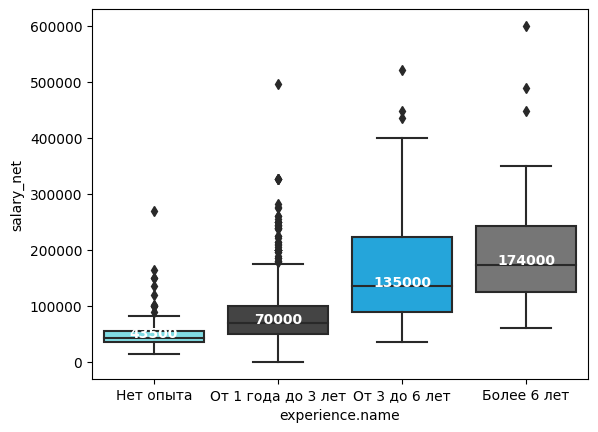

In [57]:
# Выведем ящики с усами по зарплатам, в зависимости от требуемого в вакансии опыта

category_order = ["Нет опыта", "От 1 года до 3 лет", "От 3 до 6 лет", "Более 6 лет"]
df["experience.name"] = pd.Categorical(
    df["experience.name"], categories=category_order, ordered=True
)

# Создание графика с новой палитрой
colors = ["#70eaf5", "#444444", "#07b1f8", "#767676"]
sns.boxplot(x="experience.name", y="salary_net", data=df, palette=colors)

# Вычисление и вывод медиан
medians = df.groupby(["experience.name"])["salary_net"].median().values
nobs = df["experience.name"].value_counts().values
for i, median in enumerate(medians):
    plt.text(
        i,
        median,
        f"{median:.0f}",
        horizontalalignment="center",
        size="medium",
        color="w",
        weight="bold",
    )
plt.show()


Ящики с усами показывают картину, которой можно верить: чем больше опыта, тем выше зарплата. Кандидатам без опыта в среднем готовы платить 43,5 тысяч рублей.    

Статистика по зарплатам

In [58]:
salary_count = "{:,.0f}".format(df['salary_net'].count()).replace(',', ' ')
salary_mean = "{:,.0f}".format(df['salary_net'].mean()).replace(',', ' ')
salary_median = "{:,.0f}".format(df['salary_net'].median()).replace(',', ' ')
salary_std = "{:,.0f}".format(df['salary_net'].std()).replace(',', ' ')
salary_min = "{:,.0f}".format(df['salary_net'].min()).replace(',', ' ')
salary_max = "{:,.0f}".format(df['salary_net'].max()).replace(',', ' ')

print(f"Количество вакансий с указанной зарплатой: {salary_count}")
print(f"Средняя зарплата: {salary_mean}")
print(f"Медиана зарплаты: {salary_median}")
print(f"Стандартное отклонение: {salary_std}")
print(f"Минимальная зарплата: {salary_min}")
print(f"Максимальная зарплата: {salary_max}")


Количество вакансий с указанной зарплатой: 1 635
Средняя зарплата: 101 004
Медиана зарплаты: 78 300
Стандартное отклонение: 72 920
Минимальная зарплата: 70
Максимальная зарплата: 600 000


In [59]:
x_labels = ['Количество вакансий', 'Минимальная зарплата', 
            'Стандартное отклонение', 'Медиана зарплаты', 'Средняя зарплата', 'Максимальная зарплата']

x_values = [salary_count, salary_min, salary_std, salary_median, salary_mean, salary_max]

fig = go.Figure(go.Bar(x=x_values, y=x_labels, orientation='h', marker=dict(color='#53b6e5')))

fig.update_layout(xaxis_title='Значение', yaxis_title=None, title='Характеристики зарплат в датасете')

fig.show()


Выборка для предсказания зарплаты мала, но можно попробовать это сделать

In [60]:
# Вакансия с минимальной запрлатой
df.nsmallest(1, 'salary_net')

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
4967,76319129,Финансовый менеджер / Бизнес-аналитик,Высшее экономическое или финансовое образовани...,"Анализ движения денежных средств, отчетов о до...",Обязанности: <ul> <li> <p>Анализ движения дене...,От 1 года до 3 лет,2023-04-13T10:01:35+0300,2023-04-13T10:01:35+0300,https://hh.ru/vacancy/76319129,[],[],[],False,Полная занятость,Финансовый менеджер,False,NaN,Ростов-на-Дону,70.0,NaN,RUR,False,Открытая,Этажи Юг,https://hh.ru/employer/5123260,https://api.hh.ru/vacancies?employer_id=5123260,Ростов-на-Дону,проспект Шолохова,22,47.237333,39.744558,"Ростов-на-Дону, проспект Шолохова, 22",NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,1.0,70.0,70.0


In [61]:
# Вакансия с максимальной запрлатой
df.nlargest(1, 'salary_net')

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
5112,78275964,Data Architect,Практический опыт проектирования сложных инфор...,Наши решения объединяют в себе как обеспечение...,<p>Мы<strong> </strong>— аккредитованная росси...,Более 6 лет,2023-03-20T13:12:22+0300,2023-03-20T13:12:22+0300,https://hh.ru/vacancy/78275964,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,NaN,600000.0,RUR,False,Открытая,Wanted,https://hh.ru/employer/5174849,https://api.hh.ru/vacancies?employer_id=5174849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,1.0,600000.0,600000.0


In [62]:
# Зарплаты лидов по убыванию 
df.loc[(df['lead'] == True) & (df['salary_net'].notnull())].sort_values(by='salary_net', ascending=False)


,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
4,79084256,Data Engineer (lead),"Хорошее знание технологий из стека: Python, SQ...",Готовить данные для моделей машинного обучения...,<strong>Что нужно будет делать:</strong> <ul> ...,От 3 до 6 лет,2023-04-16T09:31:35+0300,2023-04-16T09:31:35+0300,https://hh.ru/vacancy/79084256,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,300000.0,400000.0,RUR,False,Открытая,Predicto,https://hh.ru/employer/4976750,https://api.hh.ru/vacancies?employer_id=4976750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True,1.0,350000.0,350000.0
887,79171712,Senior Business Analyst,2+ years of experience as a Senior Business <h...,Prepare specifications describing a technical ...,<p>The main duties:</p> <ul> <li>Identify and ...,Более 6 лет,2023-04-11T16:33:47+0300,2023-04-11T16:33:47+0300,https://hh.ru/vacancy/79171712,[],[],[],False,Полная занятость,Аналитик,False,NaN,Москва,200000.0,350000.0,RUR,False,Открытая,Шеф Маркет,https://hh.ru/employer/988480,https://api.hh.ru/vacancies?employer_id=988480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True,1.0,275000.0,275000.0
1525,78446701,Senior/Team Lead Data Scientist,3+ года опыта в роли <highlighttext>Data</high...,Заниматься исследованием и имплементацией разл...,<p>Для основного продукта <strong>Wallcraft</s...,От 3 до 6 лет,2023-03-23T12:00:23+0300,2023-03-23T12:00:23+0300,https://hh.ru/vacancy/78446701,[],[],[],False,Полная занятость,Системный аналитик,False,NaN,Пенза,NaN,250000.0,RUR,False,Открытая,Волкрафт,https://hh.ru/employer/896866,https://api.hh.ru/vacancies?employer_id=896866,Penza,Revolyutsionnaya Street,71,53.192868,45.006782,"Penza, Revolyutsionnaya Street, 71",NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,True,1.0,250000.0,250000.0
1591,78466689,Senior/Team Lead Data Scientist,3+ года опыта в роли <highlighttext>Data</high...,Заниматься исследованием и имплементацией разл...,<p>Для основного продукта <strong>Wallcraft</s...,От 3 до 6 лет,2023-03-23T16:24:39+0300,2023-03-23T16:24:39+0300,https://hh.ru/vacancy/78466689,[],[],[],False,Полная занятость,Системный аналитик,False,NaN,Санкт-Петербург,NaN,250000.0,RUR,False,Открытая,Волкрафт,https://hh.ru/employer/896866,https://api.hh.ru/vacancies?employer_id=896866,Penza,Revolyutsionnaya Street,71,53.192868,45.006782,"Penza, Revolyutsionnaya Street, 71",NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True,1.0,250000.0,250000.0
3720,78385839,Middle+ Системный аналитик,Имеете опыт работы на позиции системного <high...,2 middle СА. 1 senior СА. 1 team lead команды ...,<p><strong>Умскул</strong> — это крупнейшая он...,От 1 года до 3 лет,2023-04-15T09:01:36+0300,2023-04-15T09:01:36+0300,https://hh.ru/vacancy/78385839,[],[],[],False,Полная занятость,Системный аналитик,False,NaN,Москва,140000.0,180000.0,RUR,False,Открытая,Remokate,https://hh.ru/employer/5539742,https://api.hh.ru/vacancies?employer_id=5539742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,True,True,True,1.0,160000.0,160000.0
5003,79187758,Аналитик / менеджер по управлению запасами,Опыт работы от 3-х лет в поставках/планировани...,Анализ процессов планирования и пополнения маг...,<p><em><strong>Надежное Российское предприятие...,От 3 до 6 лет,2023-04-12T09:09:18+0300,2023-04-12T09:09:1

In [63]:
# Топ-25 работодателей по количеству размещенных вакансий
df_top_employers = df['employer.name'].value_counts().nlargest(25).reset_index()

# Вывод графика
fig = px.bar(df_top_employers, x='employer.name', y='count', color_discrete_sequence=['#53b6e5'])

# Задание заголовка
fig.update_layout(title='Топ 25 работодателей')

# Задание меток осей
fig.update_xaxes(title='Работодатель')
fig.update_yaxes(title='Вакансий')

# Вывод графика
fig.show()


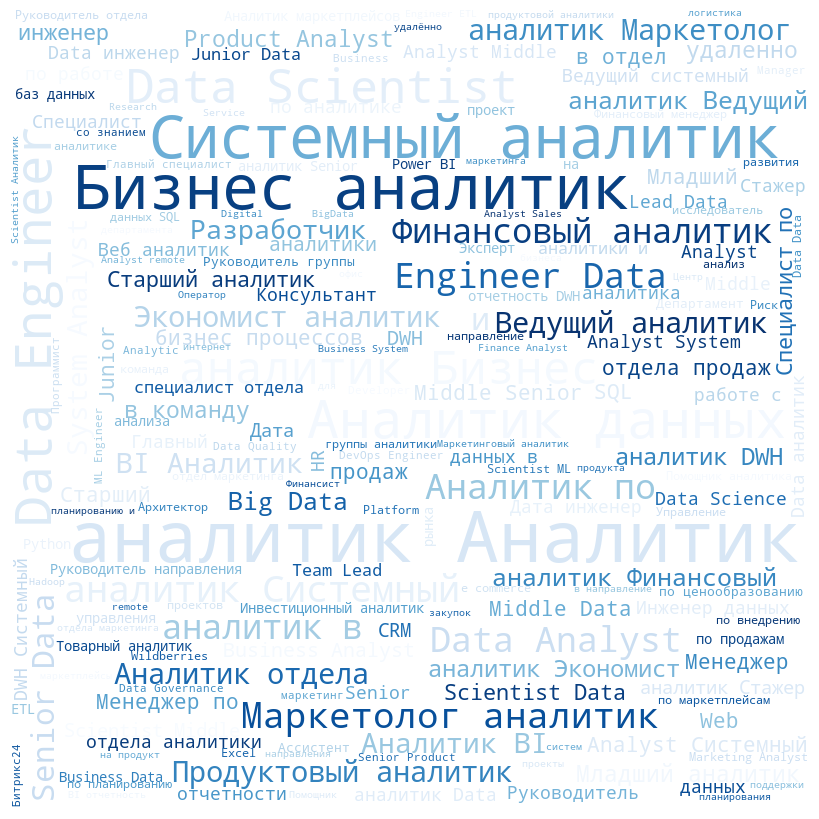

In [64]:
# Составим облако слов по полю названий вакансий

# Объединяем все строки в одну
text_roles = " ".join(df["name"])

# Создаем объект WordCloud
wordcloud = WordCloud(
    width=800, height=800, background_color="white", colormap="Blues_r", min_font_size=10
).generate(text_roles)

# Отображаем облако слов
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [65]:
# Переиндексируем даатфрейм
df = df.reset_index(drop=True)

In [66]:
df.head()

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net
0,79110745,Data Engineer,Разговорный английский. Опыт работы <highlight...,Взаимодействие с <highlighttext>data</highligh...,<p>Ищу <strong>Data Engineer</strong> в SportT...,От 3 до 6 лет,2023-04-16T14:42:13+0300,2023-04-16T14:42:13+0300,https://hh.ru/vacancy/79110745,[],[],[],True,Полная занятость,"Программист, разработчик",False,NaN,Москва,4000.0,6000.0,EUR,True,Открытая,4CV Recruitment Services,https://hh.ru/employer/5231648,https://api.hh.ru/vacancies?employer_id=5231648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,89.5,447500.0,389325.0
1,79120615,Data engineer,"Высшее техническое образование, предпочтительн...","Системный анализ, инженерная аналитика. Разраб...","<p>В крупную исследовательскую компанию, специ...",От 1 года до 3 лет,2023-04-16T17:13:22+0300,2023-04-16T17:13:22+0300,https://hh.ru/vacancy/79120615,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,180000.0,250000.0,RUR,False,Открытая,РВИ,https://hh.ru/employer/30486,https://api.hh.ru/vacancies?employer_id=30486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,1.0,215000.0,215000.0
2,78934984,Data engineer (Стажер),Имеете высшее образование или заканчиваете учи...,По результатам обучения – обязательная защита ...,<p><strong>НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! Ч...,Нет опыта,2023-04-14T11:13:27+0300,2023-04-14T11:13:27+0300,https://hh.ru/vacancy/78934984,[],[],[],False,Стажировка,"BI-аналитик, аналитик данных",False,NaN,Москва,NaN,NaN,NaN,NaN,Открытая,Sapiens solutions,https://hh.ru/employer/1789341,https://api.hh.ru/vacancies?employer_id=1789341,Москва,Нижняя Красносельская улица,40/12к2,55.774284,37.669145,"Москва, Нижняя Красносельская улица, 40/12к2",Бауманская,Арбатско-Покровская,3.17,3,55.772405,37.679040,True,False,True,False,False,False,NaN,NaN,NaN
3,78954091,Data Engineer / Дата-инженер (Middle),Понимание и интерес к области больших данных. ...,Мероприятия для поддержания хорошего настроени...,"<p><strong><em>Приветствуем тебя, будущий учас...",От 1 года до 3 лет,2023-04-14T15:27:03+0300,2023-04-14T15:27:03+0300,https://hh.ru/vacancy/78954091,[],[],[],False,Полная занятость,Системный инженер,False,NaN,Москва,250000.0,300000.0,RUR,True,Открытая,Платформа Больших Данных,https://hh.ru/employer/5202841,https://api.hh.ru/vacancies?employer_id=5202841,Москва,4-я Тверская-Ямская улица,14с1,55.773393,37.595995,"Москва, 4-я Тверская-Ямская улица, 14с1",Белорусская,Кольцевая,5.20,5,55.775179,37.582303,True,False,False,False,False,False,1.0,275000.0,239250.0
4,79084256,Data Engineer (lead),"Хорошее знание технологий из стека: Python, SQ...",Готовить данные для моделей машинного обучения...,<strong>Что нужно будет делать:</strong> <ul> ...,От 3 до 6 лет,2023-04-16T09:31:35+0300,2023-04-16T09:31:35+0300,https://hh.ru/vacancy/79084256,[],[],[],False,Полная занятость,"Программист, разработчик",False,NaN,Москва,300000.0,400000.0,RUR,False,Открытая,Predicto,https://hh.ru/employer/4976750,https://api.hh.ru/vacancies?employer_id=4976750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True,1.0,350000.0,350000.0


In [67]:
# Сохраним получившийся датафрейм в csv
df.to_csv('data/df.csv', sep=',', encoding='utf-8')

## Кластеризация вакансий по их описанию

Далее попробуем разделить вакансии по специальностям на основе их описания.

Тематическое моделирование — это метод машинного обучения, который используется для выявления тем в больших коллекциях текстовых документов. Он позволяет автоматически выявлять скрытые темы в текстах и определять, какие слова и фразы связаны с каждой темой. Тематическое моделирование используется в различных областях, включая обработку естественного языка, информационный поиск, маркетинг и анализ социальных сетей. Оно может помочь упростить анализ больших объемов текстовых данных, позволяя выявить ключевые темы и понять, как они связаны между собой.

Кластеризация текстовых данных - это сложная задача машинного обучения, но можно использовать различные методы для ее решения. Вот несколько подходов:

1. Кластеризация на основе слов: вы можете использовать методы машинного обучения, такие как K-средних или DBSCAN, чтобы кластеризовать описания вакансий на основе слов в тексте. В этом случае вам нужно будет создать матрицу признаков, используя методы векторизации, такие как TF-IDF или Word2Vec, чтобы преобразовать текст в числовые значения. Затем можно использовать эти числа в качестве входных данных для алгоритма кластеризации.

2. Кластеризация на основе тем: другой подход - использовать тематическое моделирование для кластеризации описаний вакансий на основе тем, которые встречаются в тексте. Например, можно использовать методы LDA (Latent Dirichlet Allocation) или NMF (Non-Negative Matrix Factorization), чтобы найти темы, связанные с определенными профессиональными навыками или областями. Затем можно кластеризовать описания вакансий на основе этих тем.

3. Кластеризация на основе эмбеддингов: еще один подход - использовать предварительно обученные модели эмбеддингов (например, Word2Vec или GloVe), чтобы преобразовать текст в числовые векторы, представляющие значения слов. Затем можно использовать алгоритмы кластеризации, такие как DBSCAN или AgglomerativeClustering, чтобы кластеризовать описания вакансий на основе этих эмбеддингов.

### Кластеризация вакансий методами К-средних и DBSCAN 

Сначала посмотрим на наши описания вакансий "с высоты птичьего полета" -- то есть, составим облако из самых частво встречающихся в описании слов.
Для этого тексты описаний небоходимо предобработать:
- убрать html-теги
- избавиться от лишних частей речи (прелогов, союзов, междометий и других), которые не несут смысловую нагрузку
- убрать из описания стоп-слова ()

In [68]:
# Уберем из описания вакансий html-теги
# Определяем функцию для удаления HTML-тегов
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Применяем функцию к столбцу 'description'
df['description'] = df['description'].apply(remove_html_tags)

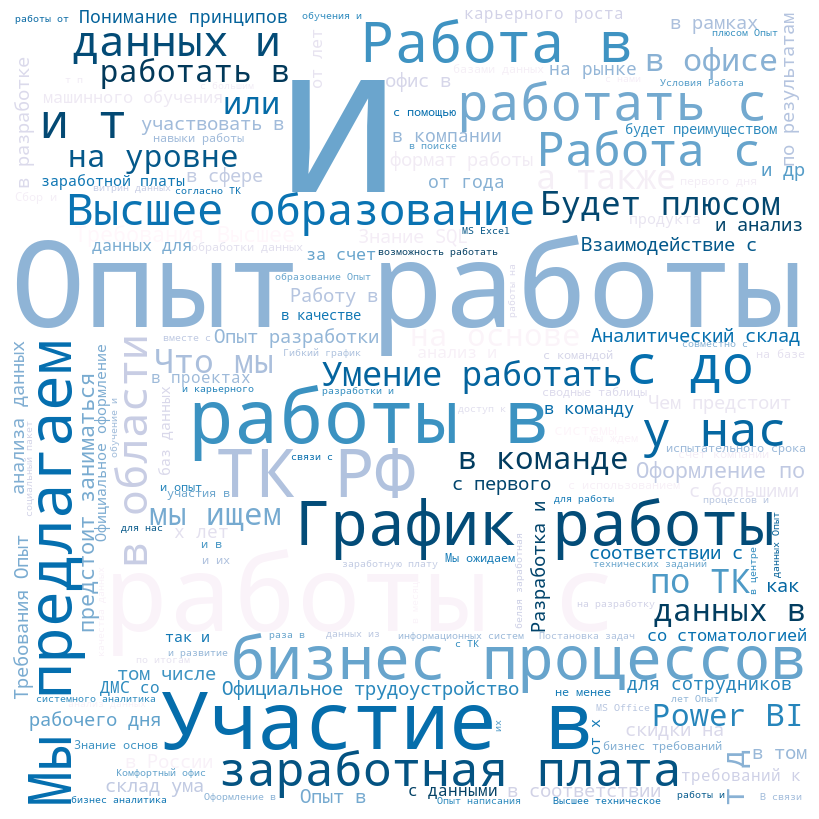

In [69]:
# Посмотрим облако слов из описания.

# Объединяем все строки в одну
text_roles = " ".join(df["description"])

# Создаем объект WordCloud
wordcloud = WordCloud(
    width=800, height=800, background_color="white", colormap="PuBu", min_font_size=10
).generate(text_roles)

# Отображаем облако слов
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Всем нужен пыт работы, -- трепещите, слушатели курсов.

Смущает малый размер слов-скилов. Попробуем убрать стоп-слова с помощью библиотеки NLTK, в которой есть список русских. Кроме того, добавим к этому списку те слова, которые по каким-то причинам попали в облако, но не устраивают нас  (самые яркие в облаке, но бесполезные). 

In [70]:
# stopwords = STOPWORDS          #stopwords.words('russian', 'english') #
# stopwords.add('Опыт работы')
# stopwords.add('стоматологией', 'и др')

# Загрузка стоп-слов
stopwords_ru = set(nltk.corpus.stopwords.words("russian"))

# Добавление дополнительных стоп-слов
custom_stopwords = set(
    [
        "Опыт работы",
        "стоматологией",
        "Работа",
        "работу",
        "Офисе",
        "Участие",
        "Предстоит заниматься",
        "предстоит заниматься",
        "предстоит",
        "заниматься",
        "ТК РФ",
        "ТК",
        "РФ",
        "Заработная плата",
        "заработная плата",
        "Опыт",
        "работы",
        "Знание",
        "Компании",
        "плюсом",
        "разработки",
        "Разработка",
        "также",
        "and",
        "Требования", 
        "график",
        "предлагаем",
        "ищу"
    ]
)

# Объединение стоп-слов
stopwords = stopwords_ru.union(custom_stopwords)


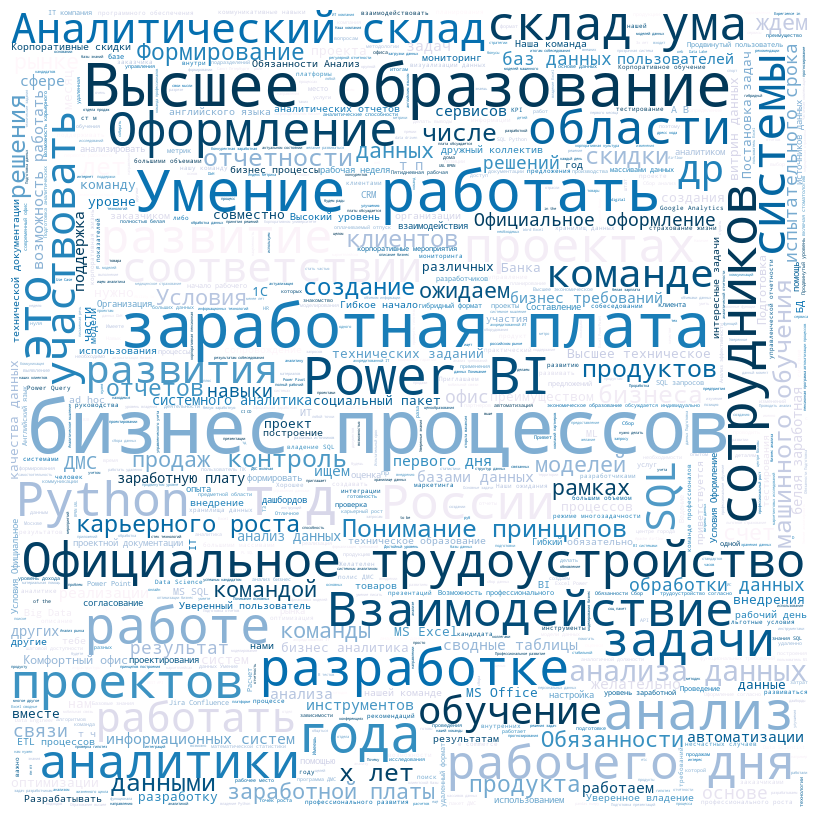

In [71]:
text_roles = " ".join(df["description"])

# Создаем объект WordCloud
skills_wc = WordCloud(
    width=800, height=800,
    background_color='white',
    colormap="PuBu",
    max_words=200000,
    stopwords=stopwords
)
# Генерация облака
skills_wc.generate(text_roles)


# Отображаем облако слов
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(skills_wc)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Уже похоже на адекватные описания вакансий по анализу данных.

Для того, чтобы обработать описания методами KMeans и DBSCAN, текст необходимо предобработать: 
- привести к одному регистру
- удалить символы пунктуации
- разбить текст на отдельные слова (токены)
- удалить стоп-слова
- лемматизировать их
- собрать обратно в текст

In [72]:
# # Загрузка стоп-слов
# nltk.download('stopwords')
# stop_words = stopwords.words('russian', 'english')

# Инициализация лемматизатора
morph = pymorphy3.MorphAnalyzer()

def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    
    # Удаление символов пунктуации
    text = re.sub(r'[^\w\s]', '', text)
    
    # Токенизация текста
    tokens = nltk.word_tokenize(text)
    
    # Удаление стоп-слов
    tokens = [token for token in tokens if token not in stopwords]
    
    # Лемматизация токенов
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    
    # Сборка предобработанного текста
    preprocessed_text = ' '.join(lemmatized_tokens) 
    
    return preprocessed_text

# Применение предобработки к столбцу 'description'
df['description_preprocessed'] = df['description'].apply(preprocess_text)

Стеммирование — это обрезание окончания слова, оставление только основы (например, “опыта работы” превратится в “опыт работ”). А лемматизация — замена слова его начальной формой (например, “мы работаем” превратится в “я работать”). 


Далее текст необходимо перевести в векторы и запустить поиск кластеров. Для этого воспользуемся TfidfVectorizer из библиотеки Scickit-learn.

> fidfVectorizer - это метод векторизации текста, который использует Tfidf-преобразование (term frequency-inverse document frequency). Он позволяет оценить важность каждого слова в документе, учитывая частоту встречаемости слова в документе и обратную частоту встречаемости слова в корпусе документов. Это позволяет выделить наиболее значимые слова в документе.
>
> Одним из главных преимуществ TfidfVectorizer является то, что он учитывает частоту встречаемости слова в корпусе документов, что позволяет выделять наиболее характерные для документа слова. Кроме того, TfidfVectorizer позволяет выделять стоп-слова, то есть слова, которые не несут смысловой нагрузки, такие как "a", "the", "and" и т.д.
>
> Однако у TfidfVectorizer есть и некоторые недостатки. Во-первых, он не учитывает контекст слов, то есть не учитывает семантическую близость слов. Во-вторых, TfidfVectorizer не учитывает порядок слов в тексте. Наконец, при большом количестве документов в корпусе TfidfVectorizer может стать неэффективным в плане использования памяти.

In [73]:
# Векторизация текста

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['description_preprocessed'])

In [74]:
X

<5128x30681 sparse matrix of type '<class 'numpy.float64'>'
	with 730941 stored elements in Compressed Sparse Row format>

In [75]:
# Поиск оптимального числа кластеров методом KMeans
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=73)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
optimal_n_clusters = np.argmin(inertia) + 2
print('Оптимальное число кластеров (метод KMeans):', optimal_n_clusters)

# Кластеризация методом KMeans
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=73)
kmeans_labels = kmeans.fit_predict(X)
kmeans_clusters, kmeans_counts = np.unique(kmeans_labels, return_counts=True)

# Количество выбросов в методе DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=7)
dbscan_labels = dbscan.fit_predict(X)
n_outliers = np.sum(dbscan_labels == -1)

# Кластеризация методом DBSCAN
dbscan_labels[dbscan_labels != -1] = kmeans_labels[dbscan_labels != -1]  # заменяем метки KMeans на метки DBSCAN
dbscan_clusters, dbscan_counts = np.unique(dbscan_labels, return_counts=True)
dbscan_counts = dbscan_counts[dbscan_clusters != -1]  # удаляем количество выбросов из списка

# Вывод результатов
print('Число вакансий в каждом кластере (метод KMeans):')
for cluster, count in zip(kmeans_clusters, kmeans_counts):
    print(f'Кластер {cluster}: {count} вакансий')

print(f'Количество выбросов (метод DBSCAN): {n_outliers}')
print('Число вакансий в каждом кластере (метод DBSCAN):')
for cluster, count in zip(dbscan_clusters, dbscan_counts):
    print(f'Кластер {cluster}: {count} вакансий')


Оптимальное число кластеров (метод KMeans): 10
Число вакансий в каждом кластере (метод KMeans):
Кластер 0: 87 вакансий
Кластер 1: 30 вакансий
Кластер 2: 926 вакансий
Кластер 3: 838 вакансий
Кластер 4: 668 вакансий
Кластер 5: 587 вакансий
Кластер 6: 753 вакансий
Кластер 7: 807 вакансий
Кластер 8: 118 вакансий
Кластер 9: 314 вакансий
Количество выбросов (метод DBSCAN): 4993
Число вакансий в каждом кластере (метод DBSCAN):
Кластер -1: 68 вакансий
Кластер 0: 7 вакансий
Кластер 2: 32 вакансий
Кластер 3: 21 вакансий
Кластер 5: 7 вакансий


Видим, что кластеризация DBSCAN работает неподходящим для нас образом. Проставим маркировку кластеров, полученную методом Кmeans (хотя, она тоже отработала странно) и проанализируем кластеры.


In [76]:
kmeans = KMeans(n_clusters=10, random_state=73)
df['role_clusters'] = kmeans.fit_predict(X)

In [77]:
df['role_clusters'].value_counts()

role_clusters
2    926
3    838
7    807
6    753
4    668
5    587
9    314
8    118
0     87
1     30
Name: count, dtype: int64

In [78]:
df.loc[df['role_clusters'] == 1]

,id,name,snippet.requirement,snippet.responsibility,description,experience.name,published_at,created_at,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,employment.name,professional_roles_name,accept_incomplete_resumes,department.name,area.name,salary.from,salary.to,salary.currency,salary.gross,type.name,employer.name,employer.alternate_url,employer.vacancies_url,address.city,address.street,address.building,address.lat,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,remote,office,junior,middle,senior,lead,currency_coef,salary_median,salary_net,description_preprocessed,role_clusters
92,77774985,Data Engineer (удаленно),Опыт работы в роли <highlighttext>Инженера</hi...,Создание витрин данных. Осуществление обработк...,Приглашаем Data Engineer-а присоединиться к на...,От 3 до 6 лет,2023-04-13T13:16:13+0300,2023-04-13T13:16:13+0300,https://hh.ru/vacancy/77774985,[],[],[],False,Полная занятость,"Программист, разработчик",False,«РОСБАНК»,Москва,NaN,NaN,NaN,NaN,Открытая,РОСБАНК,https://hh.ru/employer/599,https://api.hh.ru/vacancies?employer_id=599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN,приглашать data engineer присоединиться наш ко...,1
126,79156500,Data Engineer,"Опыт работы с реляционными базами данных, прод...",Реализация ETL-загрузки данных из внешних и вн...,Приглашаем Data Engineer-a присоединиться к ко...,От 1 года до 3 лет,2023-04-11T12:58:36+0300,2023-04-11T12:58:36+0300,https://hh.ru/vacancy/79156500,[],[],[],False,Полная занятость,"Программист, разработчик",False,«РОСБАНК»,Москва,NaN,NaN,NaN,NaN,Открытая,РОСБАНК,https://hh.ru/employer/599,https://api.hh.ru/vacancies?employer_id=599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN,приглашать data engineera присоединиться коман...,1
147,71331696,Data analyst/ Data Engineer (удаленно),"Опыт разработки GreenPlum, PostgreSQL (от 2 ле...",Сбор и подготовка данных. Разработка регулярно...,Приглашаем Data analyst/ Data Engineer присоед...,От 3 до 6 лет,2023-04-12T14:04:59+0300,2023-04-12T14:04:59+0300,https://hh.ru/vacancy/71331696,[],[],[],False,Полная занятость,"Программист, разработчик",False,«РОСБАНК»,Москва,NaN,NaN,NaN,NaN,Открытая,РОСБАНК,https://hh.ru/employer/599,https://api.hh.ru/vacancies?employer_id=599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN,приглашать data analyst data engineer присоеди...,1
189,79124094,Data Engineer,Опыта работы на аналогичной должности от 3х ле...,Исследовать источники данных. Проектировать ви...,"РОСБАНК – частный универсальный банк, работающ...",От 3 до 6 лет,2023-04-10T18:53:03+0300,2023-04-10T18:53:03+0300,https://hh.ru/vacancy/79124094,[],[],[],False,Полная занятость,"Программист, разработчик",False,«РОСБАНК»,Москва,NaN,NaN,NaN,NaN,Открытая,РОСБАНК,https://hh.ru/employer/599,https://api.hh.ru/vacancies?employer_id=599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN,росбанк частный универсальный банк работать ро...,1
272,78908191,Data engineer,Опыт работы в области <highlighttext>Data</hig...,Работа в команде аналитического CRM банка по о...,Приглашаем Data engineer-a присоединиться к ко...,От 1 года до 3 лет,2023-04-04T16:52:50+0300,2023-04-04T16:52:50+0300,https://hh.ru/vacancy/78908191,[],[],[],False,Полная занятость,"BI-аналитик, аналитик данных",False,«РОСБАНК»,Москва,NaN,NaN,NaN,NaN,Открытая,РОСБАНК,https://hh.ru/employer/599,https://api.hh.ru/vacancies?employer_id=599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,False,NaN,NaN,NaN,приглашать data engineera присоединиться коман...,1
531,78693608,Инженер безопасности Big Data (Security champion),Продвинутый администратор *NIX-систем. Наличие...,Реализация целевой архитектуры безопасности Bi...,Приглашаем Инженера б

In [79]:
df.loc[df['role_clusters'] == 1, 'employer.name'].value_counts()


employer.name
РОСБАНК    30
Name: count, dtype: int64

In [80]:
df['employer.name'].value_counts()['Тинькофф']

91

Очевидно, что кластеризация прошла в том числе по названию компаний и их кастоимзированному способу описания (часто в вакансиях пишут информацию о компании и чем они хороши). Например, 18 вакансии Тинькофф попали в первый кластер (и 19 в седьмой). Но это ведь не значит, что они ищут лишь специалистов одного плана - в вакансиях кластера есть как DA, DE, DS, BI-специалисты. 17 из 98 вакансий Тнькофф попали в один кластер. 

Делаем вывод, что кластеризация вакансий по их описания методами KMeans и DBSCAN нам не подходит.

### Латентное распределение Дирихле (LDA)

LDA основывается на двух общих предположениях:
- Документы с похожими словами обычно имеют одну и ту же тему
- Документы, в которых группы слов часто встречаются вместе, обычно имеют одну и ту же тему.
Эти предположения имеют смысл, потому что документы, имеющие одну и ту же тему, например, бизнес-темы, будут иметь такие слова, как “экономика”, “прибыль”, “фондовый рынок”, “убыток” и т. Д. Второе предположение гласит, что если эти слова часто встречаются вместе в нескольких документах, то эти документы могут принадлежать к одной и той же категории.

Математически эти два допущения можно представить в виде:
- Документы-это распределения вероятностей по скрытым темам
- Темы-это распределения вероятностей по словам

Мы будем применять LDA к столбцу “description”, так как он содержит описания, остальные столбцы будут проигнорированы.

Прежде чем мы сможем применить LDA, нам нужно создать словарь всех слов в наших данных. Сделаем это с помощью счетчика. Посмотрите на следующий сценарий:

In [81]:
df['description'].head()

0    Ищу Data Engineer в SportTech компанию Sportra...
1    В крупную исследовательскую компанию, специали...
2    НЕ НУЖНО ОТКЛИКАТЬСЯ НА ВАКАНСИЮ! ЧИТАЙТЕ ИНФО...
3    Приветствуем тебя, будущий участник нашей прог...
4    Что нужно будет делать:  Проектировать, разраб...
Name: description, dtype: object

In [82]:
import gensim
from gensim.utils import simple_preprocess
import nltk

# добавляем свои стоп-слова
my_stopwords = [
        "Опыт работы"
        , "стоматологией"
        , "Работа"
        , "работу"
        , "Офисе"
        , "Участие"
        , "Предстоит заниматься"
        , "предстоит заниматься"
        , "предстоит"
        , "заниматься"
        , "ТК РФ"
        , "ТК"
        , "РФ"
        , "Заработная плата"
        , "заработная плата"
        , "Опыт"
        , "работы"
        , "Знание"
        , "Компании"
        , "плюсом"
        , "разработки"
        , "Разработка"
        , "также"
        , "and"
        , "Требования" 
        , "график"
        , "предлагаем"
        "ищу"
    ]

# объединяем со стандартными стоп-словами из NLTK
stopwords = nltk.corpus.stopwords.words('russian') + my_stopwords

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True убирает пунктуацию
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stopwords] for doc in texts]

data = df['description'].values.tolist()
data_words = list(sent_to_words(data))
# убираем стоп-слова и выводим первые 30 слов первого элемента списка
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


['ищу', 'data', 'engineer', 'sporttech', 'компанию', 'sportradar', 'sportradar', 'крупнеишии', 'проваидер', 'спортивных', 'данных', 'мире', 'работают', 'fifa', 'uefa', 'nba', 'nhl', 'itf', 'многими', 'другими', 'торгуются', 'nasdaq', 'нанятыи', 'человек', 'присоединится', 'annotation', 'labeling', 'команде', 'computer', 'vision']


В приведенном выше  коде происходит предобработка текстовых данных для дальнейшего анализа с использованием библиотеки gensim.

Функция sent_to_words принимает список предложений и с помощью simple_preprocess из библиотеки gensim проводит простейшую предобработку, разбивая каждое предложение на отдельные токены и удаляя пунктуацию. Функция yield возвращает каждое предложение в виде списка токенов.

Функция remove_stopwords принимает на вход список списков токенов, представляющий собой выходной параметр из функции sent_to_words. Затем она проводит фильтрацию стоп-слов с помощью условного оператора и возвращает на выходе обновленный список токенов.

В основном коде data представляет собой список предобработанных текстов, из которых с помощью list(sent_to_words) создается список списков токенов data_words. Затем применяется функция remove_stopwords для фильтрации стоп-слов, и первые 30 слов первого элемента списка выводятся с помощью print

In [83]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 2), (2, 1), (3, 3), (4, 1), (5, 1), (6, 5), (7, 2), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


In [84]:
from pprint import pprint

# Количество тем
num_topics = 6

# Строим модель LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

В приведенном выше скрипте мы используем выполненяем LDA на нашей матрице терминов документа. Параметр num_topics определяет количество категорий или тем, на которые мы хотим разделить наш текст. 

In [85]:
# Выведем ключевые слова в наших темах
pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]
# Для каждого описания получим номер темы
topics = [max(prob, key=lambda y: y[1])[0] for prob in doc_lda]

# И проставим их в новый столбец
df['topic_num'] = topics

[(0,
  '0.017*"данных" + 0.012*"опыт" + 0.006*"компании" + 0.006*"бизнес" + '
  '0.005*"знание" + 0.004*"анализ" + 0.004*"процессов" + 0.004*"возможность" + '
  '0.003*"требования" + 0.003*"умение"'),
 (1,
  '0.013*"опыт" + 0.011*"данных" + 0.006*"бизнес" + 0.006*"знание" + '
  '0.005*"компании" + 0.005*"анализ" + 0.005*"умение" + 0.004*"условия" + '
  '0.004*"понимание" + 0.004*"sql"'),
 (2,
  '0.009*"опыт" + 0.008*"компании" + 0.007*"данных" + 0.006*"анализ" + '
  '0.006*"бизнес" + 0.006*"знание" + 0.004*"процессов" + 0.004*"умение" + '
  '0.004*"работа" + 0.003*"требования"'),
 (3,
  '0.013*"данных" + 0.008*"опыт" + 0.007*"компании" + 0.006*"бизнес" + '
  '0.006*"анализ" + 0.005*"знание" + 0.004*"sql" + 0.004*"умение" + '
  '0.004*"возможность" + 0.003*"требования"'),
 (4,
  '0.020*"опыт" + 0.013*"данных" + 0.006*"компании" + 0.006*"бизнес" + '
  '0.005*"знание" + 0.004*"процессов" + 0.003*"анализ" + 0.003*"работа" + '
  '0.003*"data" + 0.003*"умение"'),
 (5,
  '0.014*"опыт" + 0.012

#### Анализ результатов модели LDA

Теперь, когда у нас есть обученная модель, давайте визуализируем темы для возможности их интерпретации. Для этого мы будем использовать популярный пакет визуализации pyLDAvis, который разработан для интерактивной работы, чтобы:

* Лучше понимать и интерпретировать отдельные темы
* Лучше понимать отношения между темами

In [86]:
# Импортируем необходимые библиотеки pyLDAvis.gensim, pickle и pyLDAvis.
# Включаем возможность вывода визуализации pyLDAvis в блокноте.
# Задаем путь и имя файла, в котором будет сохранена подготовленная визуализация.
# Если условие выполняется (1==1), подготавливаем визуализацию, сохраняем в pickle-файл.
# Загружаем ранее сохраненную визуализацию из файла.
# Выводим подготовленную визуализацию.
# Сохраняем готовую html-страницу визуализации.
# Выводим подготовленную визуализацию.


import pyLDAvis.gensim
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.012489  0.003720       1        1  28.582522
1     -0.006379  0.002953       2        1  22.174818
4     -0.002850 -0.006344       3        1  17.103214
2      0.012134  0.006367       4        1  13.257050
0      0.003525 -0.004152       5        1  11.088310
3      0.006059 -0.002543       6        1   7.794085, topic_info=           Term          Freq         Total Category  logprob  loglift
63       данных  11010.000000  11010.000000  Default  30.0000  30.0000
335    компании   6065.000000   6065.000000  Default  29.0000  29.0000
389        опыт  12445.000000  12445.000000  Default  28.0000  28.0000
182      анализ   4149.000000   4149.000000  Default  27.0000  27.0000
290      бизнес   5644.000000   5644.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
161     условия    180.923003   2849.411168   Topic6  -5.9943  -0.2050
1234    участие    172.752911   2597.626769   Topic6  -6.0405  -0.1587
592   понимание    167.092894   2404.227227   Topic6  -6.0739  -0.1146
448    работать    164.134915   2921.895878   Topic6  -6.0917  -0.3275
49    аналитика    151.987225   2552.987700   Topic6  -6.1686  -0.2694

[575 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
18604      1  0.319796       aa
18604      4  0.319796       aa
18604      6  0.319796       aa
7379       1  0.035485  ability
7379       2  0.094627  ability
...      ...       ...      ...
525        2  0.244853      это
525        3  0.200334      это
525        4  0.130937      это
525        5  0.099512      это
525        6  0.058267      это

[1459 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 3, 1, 4])

Карта интерактивная, можно выбирать темы, выделенные LDA. Справа отображаются 30 самых популярных токенов, частота их появления во всех наблюдениях и частота появления в данной теме.

Ясности не добавилось: в топе "опыт", "знание", "бизнес", "компании" -- достаточно характерные слова для многих вакансий, не только лишь из области обработки данных. 

Проанализируем полученные результаты с помощью крос-таблицы: столбцами будут полученные темы, строками названия вакансий. В последнем столбце подсчитаем сумму по всем темам для вакансии. Выведем топ-20.

In [87]:
table = pd.crosstab(df.name, df.topic_num)
table['sum'] = table.sum(axis=1)
sorted_table = table.sort_values(by='sum', axis=0, ascending=False)
top_20 = sorted_table.head(20)
print(top_20)


topic_num                   0   1   2   3   4    5  sum
name                                                   
Аналитик                   59  99  86  28  20  137  429
Бизнес-аналитик            24  68  68  12  28   67  267
Системный аналитик          6  71  14   9  55   33  188
Аналитик данных            22  20  14   7  16   57  136
Маркетолог-аналитик        17  17  40   5   5   26  110
Финансовый аналитик        10   3  39   5   7   30   94
Экономист-аналитик         16   4  39   4   1   16   80
Data Engineer              27  18   0   2  23    9   79
Data Scientist              2  12   0   2  17   12   45
Ведущий аналитик            3   8   8   2   2   16   39
Аналитик отдела продаж      9   4   5   2   0   19   39
Продуктовый аналитик        3   9   2   4   6   10   34
Data Analyst                5   5   3   3   9    9   34
Системный аналитик DWH      0  12   0  16   0    2   30
Аналитик BI                 1   7   1   0   2   17   28
Младший аналитик            3   7   4   4   2   

Результаты разочаровывают:
- Больше всего вакансий в нулевой группе, на втором месте первая. 

- Некоторые термины могут быть отнесены к разным темам, например, "Data Engineer" и "Data engineer" отнесены к разным темам, что может указывать на необходимость более тщательной предобработки данных;

- Некоторые темы, такие как 0 и 5, представлены достаточно широко и встречаются в различных профессиональных областях (например, "Аналитик" или "Data Engineer");

- Некоторые темы, такие как 1 и 3, относятся к узкоспециализированным профессиональным областям (например, "Data Scientist" или "Системный аналитик DWH").

То есть, глядя на распаределение групп по названиям вакансий становится понятно, что записи разделились *не по специальностям*.

Делаем вывод, что кластеризовать вакансии на специальности по их описаниям у нас не вышло.

Основные причины этого, по моему мнению:

- HRы подходят творчески к составлению вакансий, некоторые компании в описание добавляют много не относящегося к вакансии текста (рассказ о компании, расказ о приемуществах работы именно у них и прочее подобное);

- Не все вакансии составлены профессиональными работниками найма, вследствие чего получается "хотим что-то примерно такое, но точно не знаем, что".

Оставим эту затею, будем пробовать подбирать вакансии по резюме.


### Подбор вакансий по резюме

Подбор подходящих для резюме вакансий будем осуществлять по следующему алгоритму:

1. Получаем резюме пользователя (будем поддерживать основные форматы -- doc, docx и pdf), переводим его в текст;

2. Предобрабатываем текст, векторизуем его;

3. Используем меру косинусной для нахождения наиболее близких в резюме вакансий. 

> Косинусное расстояние является метрикой, используемой для измерения сходства между двумя векторами в n-мерном пространстве. Оно определяется как косинус угла между двумя векторами, и может быть использовано для определения близости между наборами данных, представленными векторами. В случае использования косинусного расстояния для текстовых данных, каждый документ представляется в виде вектора, где каждая компонента соответствует определенному слову, а значение компоненты равно частоте встречаемости этого слова в документе. Более похожие документы имеют более близкое косинусное расстояние между ними, что позволяет использовать эту метрику для задач, таких как поиск похожих документов, кластеризация документов или классификация текстовых данных.

Сначала нам необходимо импортировать резюме, получить его текст. Наиболее популярные форматы для хранения резюме -- pdf и doc.


В Python есть несколько библиотек для работы с PDF-файлами. Некоторые из них могут извлекать текст из PDF-файлов:

* **PyPDF2**: библиотека для работы с PDF-файлами. Она позволяет извлекать текст, а также метаданные и изображения из PDF-файлов.

* **pdfminer**: это библиотека для извлечения информации из PDF-файлов, включая текст, метаданные и структуру документа.

* **tika**: это библиотека, основанная на Java, которая может извлекать текст из различных типов документов, включая PDF-файлы.

* **pdftotext**: это утилита командной строки, которая может преобразовывать PDF-файлы в текстовый формат. Ее можно вызывать из Python-скрипта с помощью subprocess.

Для работы с документами формата .doc, существует несколько библиотек для Python:

* **python-docx**: библиотека для работы с документами Microsoft Word в формате .docx. С ее помощью можно извлекать текст, таблицы, изображения, а также создавать новые документы.

* **pywin32**: библиотека для работы с объектной моделью приложений Windows, в том числе Microsoft Word. С ее помощью можно запускать Word, открывать документы, извлекать текст и другую информацию из документов.

* **textract**: универсальная библиотека для извлечения текста из различных форматов документов, включая .doc.

* **unoconv**: конвертер документов, который может быть использован из Python. С его помощью можно конвертировать документы в различные форматы, включая .doc в текстовый формат.

* **antiword**: утилита командной строки для извлечения текста из документов формата .doc. Ее можно вызвать из Python при помощи модуля subprocess.

Для компактности кода воспользуемся библиотекой **textract** -- так нам не придется использовать две отдельные библиотеки. Облечем код в несколько функций.

In [104]:
def extract_resume_text(resume_file_path):
    """
    Функция, которая принимает на вход путь к файлу,
    извлекает текст из файла при помощи библиотеки textract
    и возвращает полученный текст
    """
    
    try:
        text = textract.process(resume_file_path)
    except textract.exceptions.ExtensionNotSupported as e:
        return f"Формат файла {e} не поддерживается. Выберите резюме в формате PDF, DOC или DOCX."
    return text.decode('utf-8')

In [115]:
from nltk.corpus import stopwords
stopwords_list = list(stopwords.words('russian'))

def text_prep(text):
    """
    Функция, которая извлекает готовит текст 
    для векторизации:
    - приводит к нижнему регистру
    - удаляет символы пунктуации
    - токенизирует
    - удаляет стоп-слова
    - леммаатизирует токены
    - собирает лемматизированные токены в строку 
    """
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords_list]
    morph = pymorphy3.MorphAnalyzer()
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    return ' '.join(lemmatized_tokens)

In [106]:
# # ЯЧЕЙКА ВЫПОЛНЯЕТСЯ ДОЛГО (около 8 минут! ВМЕСТО НЕЕ ЛУЧШЕ ВЫПОЛНЯТЬ СЛЕДУЮЩУЮ,
# # ГДЕ УЖЕ ЕСТЬ СОЗДАННЫЙ СТОЛБЕЦ
#
# # Создадим новый стобец с обработанным для косинусной близости описанием 
# df['description_for_matching'] = df['description'].apply(text_prep)
#
# Сохраним получившийся датафрейм в csv
# df.to_csv('data/df.csv', sep=',', encoding='utf-8')

In [91]:
df = pd.read_csv("data/df.csv", sep=',', encoding='utf-8')

In [108]:
# Определяем векторизатор
vectorizer = TfidfVectorizer(stop_words=None, ngram_range=(1, 2), max_df=0.5, min_df=2, max_features=20000)

# Векторизуем описания вакансий
X = vectorizer.fit_transform(df['description_for_matching'])

In [109]:
def vectorize_resume(resume_file_path, vectorizer):
    """
    Функция, которая извлекает текст из резюме,
    предобрабатывает его и векторизует 
    """
    
    text = extract_resume_text(resume_file_path)
    preprocessed_text = text_prep(text)
    vectorized_text = vectorizer.transform([preprocessed_text])
    
    return vectorized_text

In [117]:
def get_top_similar_vacancies(resume_file_path, X, df, vectorizer, n_top=100):
    # Векторизуем резюме
    vectorized_resume = vectorize_resume(resume_file_path, vectorizer)
    
    # Вычисляем косинусные расстояния между векторизованным резюме и векторизованными описаниями вакансий
    similarities = cosine_similarity(vectorized_resume, X).ravel()
    
    # Сортируем индексы вакансий по убыванию близости
    top_n_indices = similarities.argsort()[::-1][:n_top]
    
    # Вычисляем процент совпадения для каждой вакансии
    match_percentages = similarities[top_n_indices] * 100
    
    # Выводим список из 10 самых близких вакансий с процентом совпадения
    top_similar_vacancies = df.iloc[top_n_indices][['name', 'snippet.requirement', 'snippet.responsibility', 'alternate_url']].copy()
    top_similar_vacancies['match_percentage'] = match_percentages.round(1)
    
    return top_similar_vacancies

In [120]:
resume_file_path = 'data/cv.pdf'
top_similar_vacancies = get_top_similar_vacancies(resume_file_path, X, df, vectorizer)
top_similar_vacancies.head(20)

,name,snippet.requirement,snippet.responsibility,alternate_url,match_percentage
5092,Менеджер по планированию и развитию складских ...,"Excel, SQL– необходимо владеть на продвинутом ...",Проводить анализ эффективности складских проце...,https://hh.ru/vacancy/78786912,16.4
3284,Аналитик склада,Инициативность - внесение предложений по оптим...,Организация работы ключевых участков склада с ...,https://hh.ru/vacancy/79295329,16.2
2689,Аналитик/BI-Analyst,"Навыки разработки стандартов, оптимизации проц...",3) <highlighttext>Аналитика</highlighttext> и ...,https://hh.ru/vacancy/79318426,15.3
2800,Системный аналитик WMS,Высшее образование (предпочтительно техническо...,"Сбор, формализация и согласование требований с...",https://hh.ru/vacancy/79117329,14.5
2812,Системный аналитик WMS,Высшее образование (предпочтительно техническо...,"Сбор, формализация и согласование требований с...",https://hh.ru/vacancy/79117328,14.5
4430,Ведущий аналитик (Отдел бюджетирования и анали...,Высшее экономическое образование. Знание струк...,Осуществлять формирование факторного анализа р...,https://hh.ru/vacancy/78163988,13.8
3279,Аналитик учета товародвижения,Знание функциональности типового решения 1С:Уп...,Полный анализ движения товара от поставщика до...,https://hh.ru/vacancy/79213648,13.8
3021,Аналитик склада,"Понимание процессов работы WMS, ERP систем. Оп...",Формирование топологии складов. Подготовка <hi...,https://hh.ru/vacancy/79122236,13.8
3123,Аналитик склада,"Понимание процессов работы WMS, ERP систем. Оп...",Формирование топологии складов. Подготовка <hi...,https://hh.ru/vacancy/79122237,13.8
1851,Аналитик,Хорошее знание складских (приемка/размещение/о...,...и перенос отчетов по ключевым показателям в...,https://hh.ru/vacancy/79116502,13.5


In [121]:
# Проверка на резюме сеньора с hh.ru

resume_file_path = 'data/cv2.docx'
top_similar_vacancies = get_top_similar_vacancies(resume_file_path, X, df, vectorizer)
top_similar_vacancies.head(20)

,name,snippet.requirement,snippet.responsibility,alternate_url,match_percentage
4951,Разработчик SAS:Data/ETL,ЧТО ХОТИМ УВИДЕТЬ ОТ ВАС: - Опыт разработки ET...,Аналитическая часть. - Cогласование и уточнени...,https://hh.ru/vacancy/78548794,14.7
375,Data scientist (Middle),"...обучения Python, PySpark. Опыт работы с Air...",Feature-<highlighttext>engineering</highlightt...,https://hh.ru/vacancy/79273001,14.6
1346,Архитектор Data,Опыт работы с базами данных в качестве <highli...,Аналитическая часть. - Cогласование и уточнени...,https://hh.ru/vacancy/78575624,14.5
355,Data Scientist,Применял ML алгоритмы к табличными данным: пон...,Работать с <highlighttext>data</highlighttext>...,https://hh.ru/vacancy/78271476,14.2
694,Аналитик Данных,Опыт работы <highlighttext>Аналитиком</highlig...,Профилирование источников данных. Моделировани...,https://hh.ru/vacancy/75631064,13.7
1457,Data Scientist,Есть опыт работы с методами машинного обучения...,"Команды работают с последними технологиями, об...",https://hh.ru/vacancy/78706463,13.6
1123,Архитектор Data/ETL,Опыт работы с базами данных в качестве <highli...,Cогласование и уточнение требований к системе ...,https://hh.ru/vacancy/78549287,13.5
732,Data analyst,"Python (pandas, numpy и т.д.), умения применят...",Анализ эффективности сотрудников блока Корпорт...,https://hh.ru/vacancy/78632870,13.3
725,Аналитик Data,Опыт работы с базами данных в качестве <highli...,Аналитическая часть. - Согласование и уточнени...,https://hh.ru/vacancy/78578025,13.1
643,Data Analyst,Опыт работы <highlighttext>Data</highlighttext...,"Строить отчеты, дашборды. Заниматься построени...",https://hh.ru/vacancy/76391927,13.0


In [116]:
text = text_prep(extract_resume_text(resume_file_path))
get_top_english_bigrams(text)

[(('data', 'science'), 1)]